# Librerías

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Sobre el dataset
Este dataset contiene una amplia gama de indicadores financieros clave de empresas que forman parte del índice S&P500. Incluye información fundamental, como la capitalización de mercado, ingresos, y utilidades, junto con ratios financieros esenciales como el P/E (precio a ganancias), P/B (precio a valor en libros), y P/S (precio a ventas). Además, el dataset abarca datos de rendimiento a corto y largo plazo, indicadores de rentabilidad como ROA (retorno sobre activos) y ROE (retorno sobre capital), y variables relacionadas con la actividad en el mercado, como el interés corto y la volatilidad. Este conjunto de datos es ideal para analizar tanto el desempeño financiero como el comportamiento en el mercado de las principales empresas del S&P500, ofreciendo una visión integral de su situación económica, liquidez, y perspectivas de crecimiento. Debido al objetivo de este proyecto, se hará enfoque especial en indicadores como ROE, ROA y ROI.

In [2]:
df = pd.read_csv('snp500_companies_description.csv')
df.replace('-', np.nan, inplace=True)
df.head()

,Company,Major index membership,Market capitalization,Income (ttm),Revenue (ttm),Book value per share (mrq),Cash per share (mrq),Dividend (annual),Dividend yield (annual),Full time employees,...,Performance (Quarter),Performance (Half Year),Performance (Year),Performance (Year To Date),Beta,Average True Range (14),"Volatility (Week, Month)",Previous close,Current stock price,Performance (today)
0,A,S&P 500,41.05B,1.32B,6.93B,18.95,NaN,0.90,0.64%,18300,...,-6.59%,7.56%,9.32%,-5.53%,1.04,3.27,2.37% 2.09%,140.90,141.37,0.33%
1,AAL,S&P 500,10.65B,127.00M,48.97B,-8.91,13.97,NaN,NaN,129700,...,14.14%,17.76%,21.07%,28.59%,1.56,0.48,2.65% 2.73%,16.59,16.36,-1.41%
2,AAP,S&P 500,7.88B,501.90M,11.15B,45.06,4.52,6.00,4.54%,40000,...,-9.20%,-25.89%,-34.12%,-10.13%,1.15,3.70,2.08% 2.39%,132.21,132.14,-0.05%
3,AAPL,"DJIA, NDX, S&P 500",2336.71B,95.17B,387.54B,3.57,3.36,0.92,0.60%,164000,...,7.70%,-1.31%,-2.24%,18.46%,1.29,3.30,1.87% 1.86%,152.87,153.91,0.68%
4,ABBV,S&P 500,261.85B,11.78B,58.05B,9.74,5.27,5.92,3.96%,50000,...,-8.84%,7.60%,1.43%,-7.65%,0.55,2.80,1.91% 1.86%,149.60,149.25,-0.23%


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 73 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Company                                                                    496 non-null    object 
 1   Major index membership                                                     490 non-null    object 
 2   Market capitalization                                                      496 non-null    object 
 3   Income (ttm)                                                               491 non-null    object 
 4   Revenue (ttm)                                                              496 non-null    object 
 5   Book value per share (mrq)                                                 495 non-null    object 
 6   Cash per share (mrq)                                      

In [4]:
df.describe(include='all')

,Company,Major index membership,Market capitalization,Income (ttm),Revenue (ttm),Book value per share (mrq),Cash per share (mrq),Dividend (annual),Dividend yield (annual),Full time employees,...,Performance (Quarter),Performance (Half Year),Performance (Year),Performance (Year To Date),Beta,Average True Range (14),"Volatility (Week, Month)",Previous close,Current stock price,Performance (today)
count,496,490,496,491,496,495,475,393,393,495,...,496,496,496,496,487,496.000000,496,496.000000,496.000000,496
unique,496,4,474,419,460,480,408,199,270,409,...,465,476,486,459,158,NaN,492,NaN,NaN,309
top,WMB,S&P 500,13.76B,1.32B,2.59B,38.67,0.50,1.00,1.45%,45000,...,0.48%,-8.01%,-12.30%,2.28%,0.94,NaN,2.05% 1.93%,NaN,NaN,0.43%
freq,1,389,3,7,3,2,4,9,6,5,...,3,3,2,3,9,NaN,2,NaN,NaN,6
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.037661,NaN,171.426774,170.964637,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.911350,NaN,317.879747,318.199345,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.200000,NaN,3.020000,3.020000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.305000,NaN,58.837500,58.747500,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.390000,NaN,106.845000,105.140000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.375000,NaN,199.462500,199.042500,NaN


## Datos faltantes

<Figure size 1200x600 with 0 Axes>

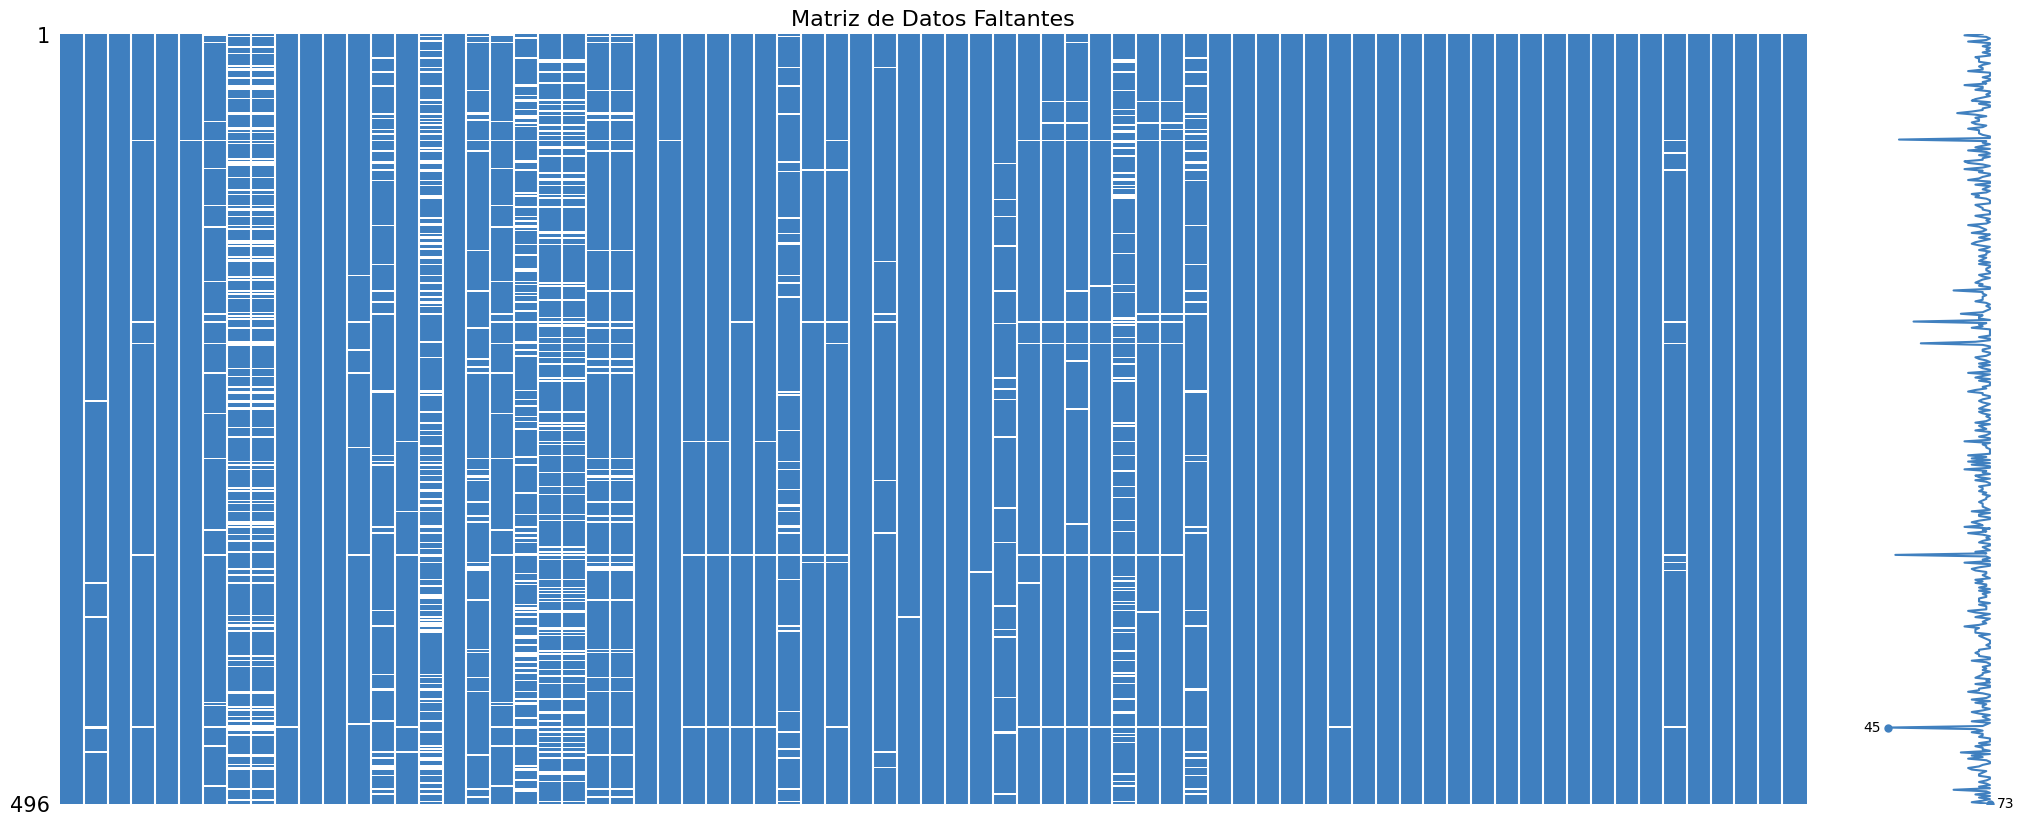

In [5]:
plt.figure(figsize=(12, 6))
msno.matrix(df, color=(0.25, 0.5, 0.75), fontsize=12)
plt.title('Matriz de Datos Faltantes', fontsize=16)
plt.show()

In [7]:
missing_count = df.isnull().sum()
missing_percentage = (missing_count / len(df)) * 100
missing_data_summary = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percentage})
missing_data_summary = missing_data_summary[missing_data_summary['Missing Count'] > 0]
missing_data_summary.sort_values(by= 'Missing Count',ascending = False)

,Missing Count,Missing Percentage
Price-to-Earnings-to-Growth,115,23.185484
Dividend yield (annual),103,20.766129
Dividend (annual),103,20.766129
Price to Free Cash Flow (ttm),90,18.145161
Quick Ratio (mrq),90,18.145161
Current Ratio (mrq),89,17.943548
Gross Margin (ttm),71,14.314516
Price-to-Earnings (ttm),39,7.862903
Long Term Debt to Equity (mrq),38,7.661290
Total Debt to Equity (mrq),38,7.661290


Se encuentran datos faltantes de 40 de las variables, sin embargo el porcentaje de estos en ninguna supera el 25%. 

# Sobre las variables

## Ticker y membresía en índice principal

Este dataset cuenta con 73 variables y 496 registros, dentro de estas se puede encontrar el **ticker** o símbolo bursátil de la empresa para cada uno de los registros y el `Major index membership` o membresía en índice principal que indica si la empresa pertenece a un índice bursátil. 

```{admonition} ¿Que és un índice bursátil?
Un índice bursátil es una medida que refleja el comportamiento general de un grupo de acciones en el mercado de valores. Existen muchos índices diferentes en el mundo, y cada uno agrupa empresas con características comunes, como el tamaño, el tipo de industria o la región, para facilitar el análisis de las tendencias y el rendimiento en los mercados financieros.
```

<Figure size 300x300 with 0 Axes>

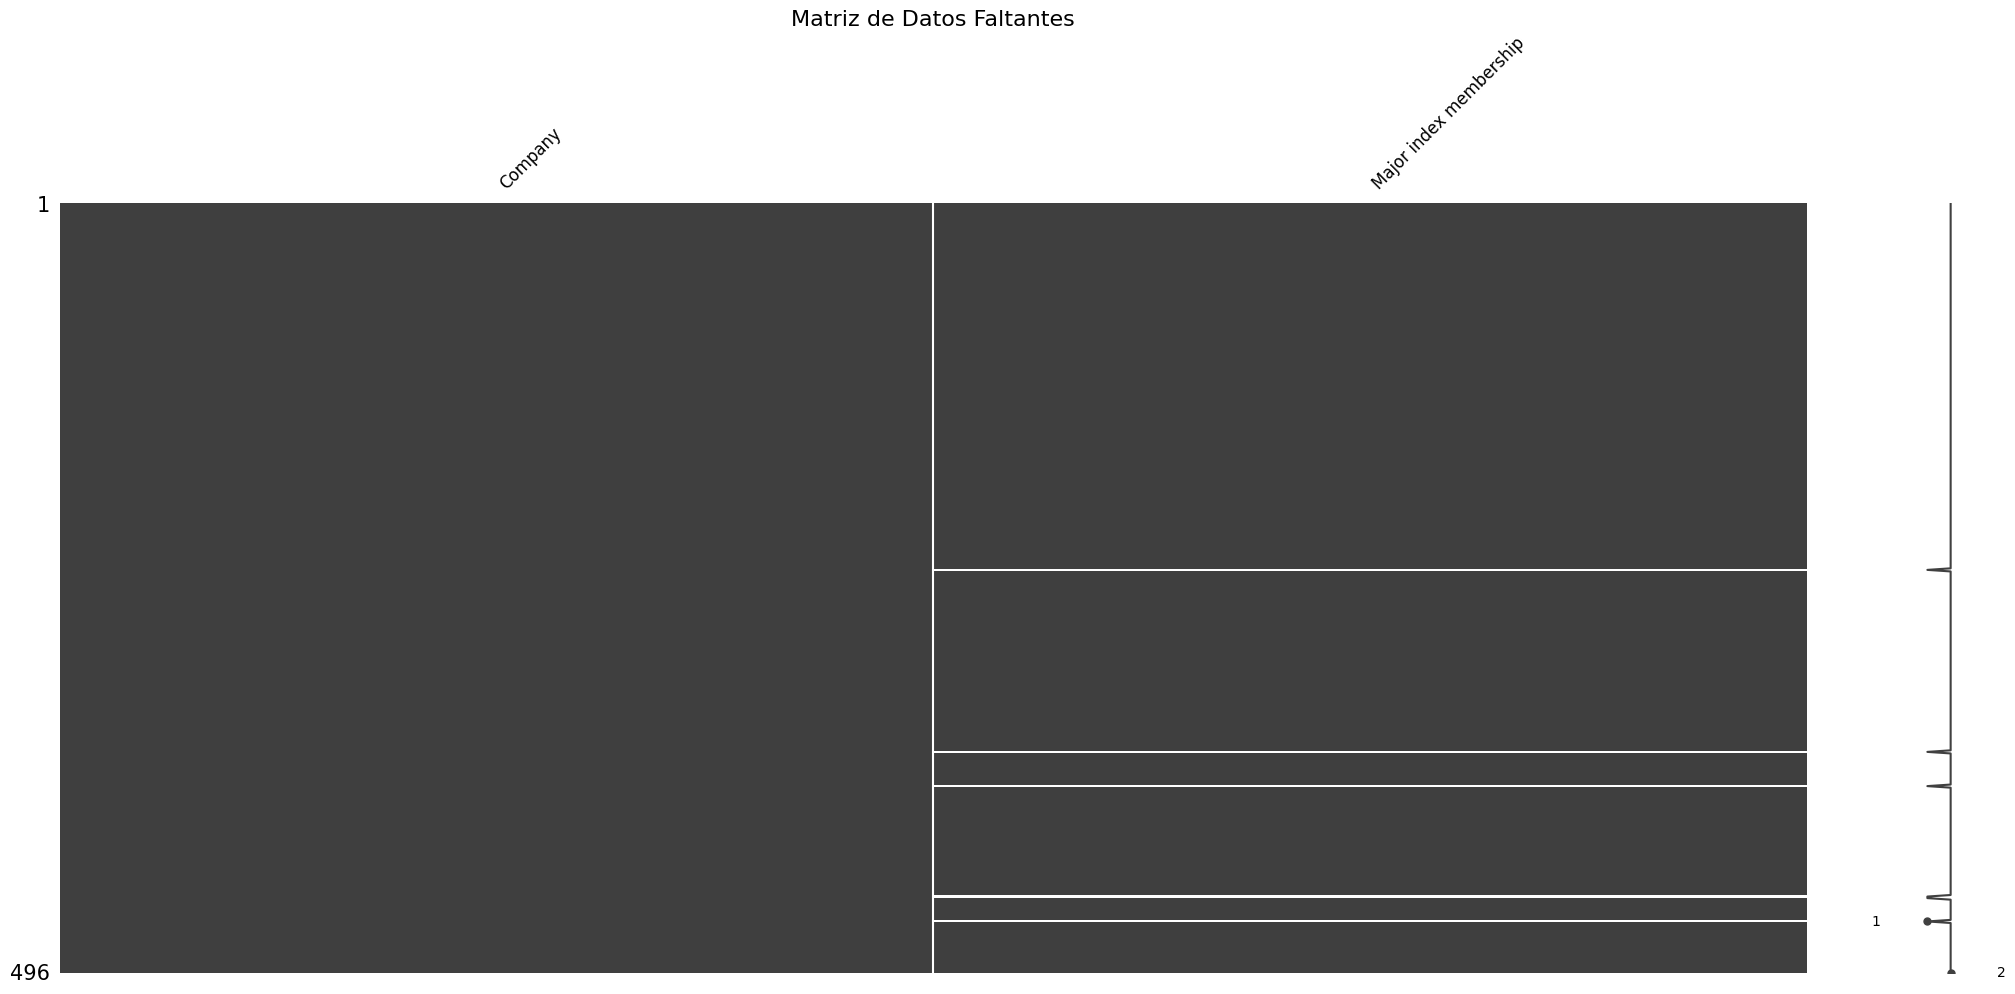

In [8]:
plt.figure(figsize=(3, 3))
msno.matrix(df[['Company','Major index membership']], fontsize=12)
plt.title('Matriz de Datos Faltantes', fontsize=16)
plt.show()

Se presentan 6 datos faltantes en la variable asociada a la membresía en índice debido a empresas que no figuran en ninguno de estos.

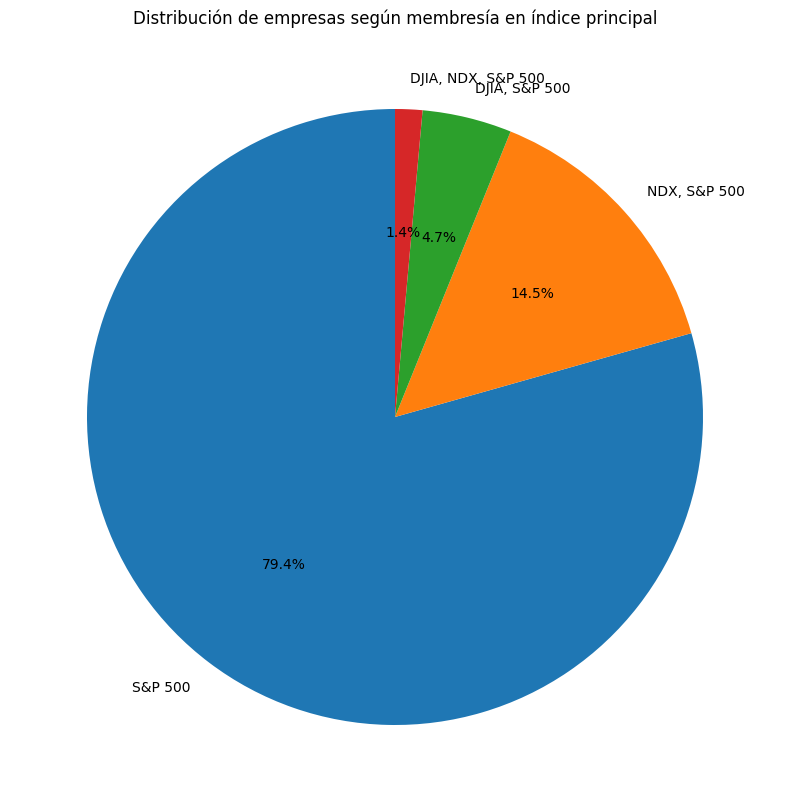

In [9]:
plt.figure(figsize=(10, 10))
plt.pie(df['Major index membership'].value_counts(), labels=df['Major index membership'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title("Distribución de empresas según membresía en índice principal")

plt.show()


El 78.4% de las empresas solo tienen presencia en el índice **SP 500**, el cual es uno de los más grandes y más conocidos en el mundo compuesto de las 500 empresas principales de estados unidos. El 14.3% de empresas forman parte tanto del **NASDAQ 100 (NDX)** como del **S&P 500**. El *NASDAQ 100* está compuesto principalmente por grandes compañías tecnológicas, lo que significa que estas empresas tienen una doble representación, abarcando tanto el sector tecnológico como el mercado más amplio de Estados Unidos. El 4.6% están presentes en el **Dow Jones Industrial Average (DJIA)** y también en el **S&P 500**. El DJIA incluye solo 30 grandes empresas industriales, así que estas compañías forman parte de los principales índices tanto por su peso en la industria como en el mercado general de EE.UU. Y por último, el 1.4% tiene presencia en los tres grandes índices: **DJIA**, **NASDAQ 100 (NDX)** y **S&P 500**. Estas empresas son muy significativas, tanto en el sector industrial como tecnológico, y tienen un impacto en el mercado más amplio. En cuanto al 1.2% restante, son emrpesas que no forman parte de estos índices y corresponden a: IPG Photonics Corporation (IPGP), PENN Entertainment, Inc. (PENN), PVH Corp. (PVH), Under Armour, Inc. (UA), Under Armour, Inc. (UAA) y Vornado Realty Trust (VNO).

## Capitalización del mercado 

La capitalización de mercado (`Market capitalization`) es el valor total de mercado de una empresa, determinado por el precio de sus acciones y es una medida utilizada para valorar el tamaño y la importancia de una empresa en el mercado.

In [47]:
df['Market capitalization'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 496 entries, 0 to 495
Series name: Market capitalization
Non-Null Count  Dtype 
--------------  ----- 
496 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


Se nota que esta variable no cuenta con datos faltantes.

In [48]:
# Existen varuables que contienen M y B para indicar millones y billones, aquí se pasan a enteros. 
def clean_mb(x):
    if isinstance(x, str):
        x = x.replace(',', '').strip()
        if 'B' in x:
            return float(x.replace('B', '')) * 1e9
        elif 'M' in x:
            return float(x.replace('M', '')) * 1e6
        return float(x)
    
    return float(x) if pd.notnull(x) else x

In [49]:
df['Market capitalization'] =df['Market capitalization'].apply(clean_mb)

In [50]:
df['Market capitalization'].describe()

count    4.960000e+02
mean     7.195290e+10
std      1.744565e+11
min      3.080000e+09
25%      1.595000e+10
50%      2.990500e+10
75%      5.860500e+10
max      2.336710e+12
Name: Market capitalization, dtype: float64

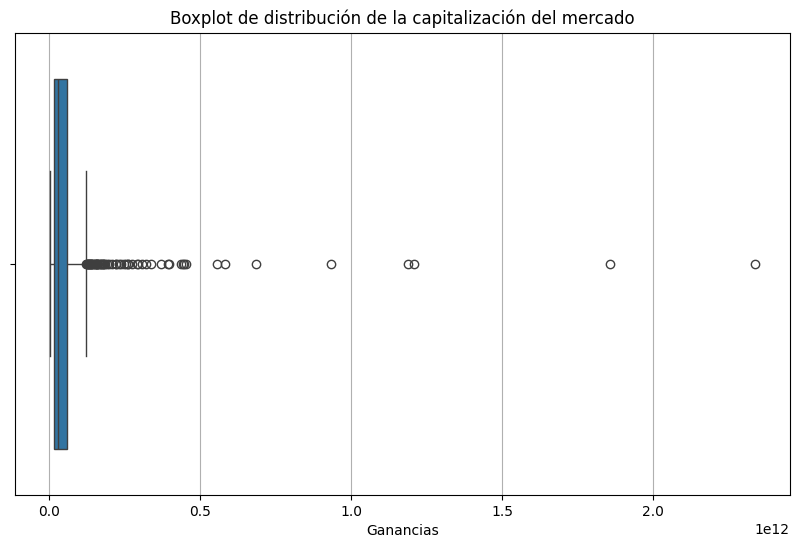

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Market capitalization'], orient='h')
plt.title('Boxplot de distribución de la capitalización del mercado')
plt.xlabel('Ganancias') 
plt.ylabel('')
plt.grid(axis='x')
plt.show()

En promedio, las empresas tienen una capitalización de mercado de 71.95 mil millones de dólares, lo que indica un tamaño considerable. Sin embargo, la desviación estándar es elevada, alcanzando los 174.46 mil millones, lo que sugiere una gran variabilidad en el tamaño de las empresas dentro del conjunto de datos.

Los percentiles revelan diferencias notables: el 25% de las empresas tiene una capitalización de mercado menor a 15.95 mil millones, mientras que el 75% supera los 58.60 mil millones, indicando que, aunque hay empresas de menor tamaño, también hay muchas de tamaño significativo. El valor mínimo registrado es de 3.08 mil millones, mostrando la presencia de algunas empresas relativamente pequeñas en el mercado. Por otro lado, el valor máximo, de 2.33 billones de dólares, resalta la magnitud de algunas de las empresas más grandes, probablemente corporaciones globales de gran impacto económico.

Este análisis muestra una distribución asimétrica, con un pequeño grupo de gigantes que distorsionan el promedio y la variabilidad del grupo, tal como se puede observar en el boxplot y la gran cantidad de datos atípicos presentes en estos. 

## Indicadores de rentabilidad y desempeño financiero

En esta sección se analizarán las variables de mayor interés para este proyecto que son los indicadores de rentabilidad y desempeño financierto, los cuáles son métricas utilizadas para evaluar la eficiencia, la capacidad de generar beneficios y la salud financiera de una empresa. En primer lugar analizaremos los asociados a retornos: **ROA**, **ROE** y **ROI**.

### ROA, ROE y ROI

**ROA**, **ROE** y **ROI** son tres indicadores financieros clave utilizados para medir la rentabilidad y eficiencia de una empresa.

- *ROA o Retorno sobre los activos*: Mide la eficiencia con la que una empresa utiliza sus activos para generar beneficios. 
$$ROA = \frac{\textup{Ingreso neto}}{\textup{Total de activos}}*100$$

- *ROE o Retorno sobre el capital*: Indica la rentabilidad que obtiene una empresa sobre los fondos propios de los accionistas. Refleja cuán bien la empresa utiliza el capital de los inversores para generar beneficios.
$$ROE = \frac{\textup{Ingreso neto}}{\textup{Patrimonio neto}}*100$$

- *ROI o retorno sobre la inversión*: Mide el rendimiento de una inversión en relación con su costo. Es un indicador general de rentabilidad que se usa tanto en el análisis financiero de empresas como en la evaluación de proyectos de inversión.
$$ROI = \frac{\textup{Ingreso neto}}{\textup{Costo de la inversión}}*100$$

Cada uno de estos ratios proporciona una visión diferente de la eficiencia y rentabilidad, y son ampliamente utilizados por inversores y analistas para evaluar el desempeño financiero de una empresa.

In [10]:
for col in ['Return on Assets (ttm)', 'Return on Equity (ttm)', 'Return on Investment (ttm)']:
    df[col] = df[col].apply(lambda x: float(x.strip('%')) / 100 if isinstance(x, str) and '%' in x else (float(x) if pd.notnull(x) else x))

data = df[['Return on Assets (ttm)', 'Return on Equity (ttm)', 'Return on Investment (ttm)']]

# Ahora está en porcentajes sin simbolo entre 100.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Return on Assets (ttm)      489 non-null    float64
 1   Return on Equity (ttm)      484 non-null    float64
 2   Return on Investment (ttm)  490 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


<Figure size 300x300 with 0 Axes>

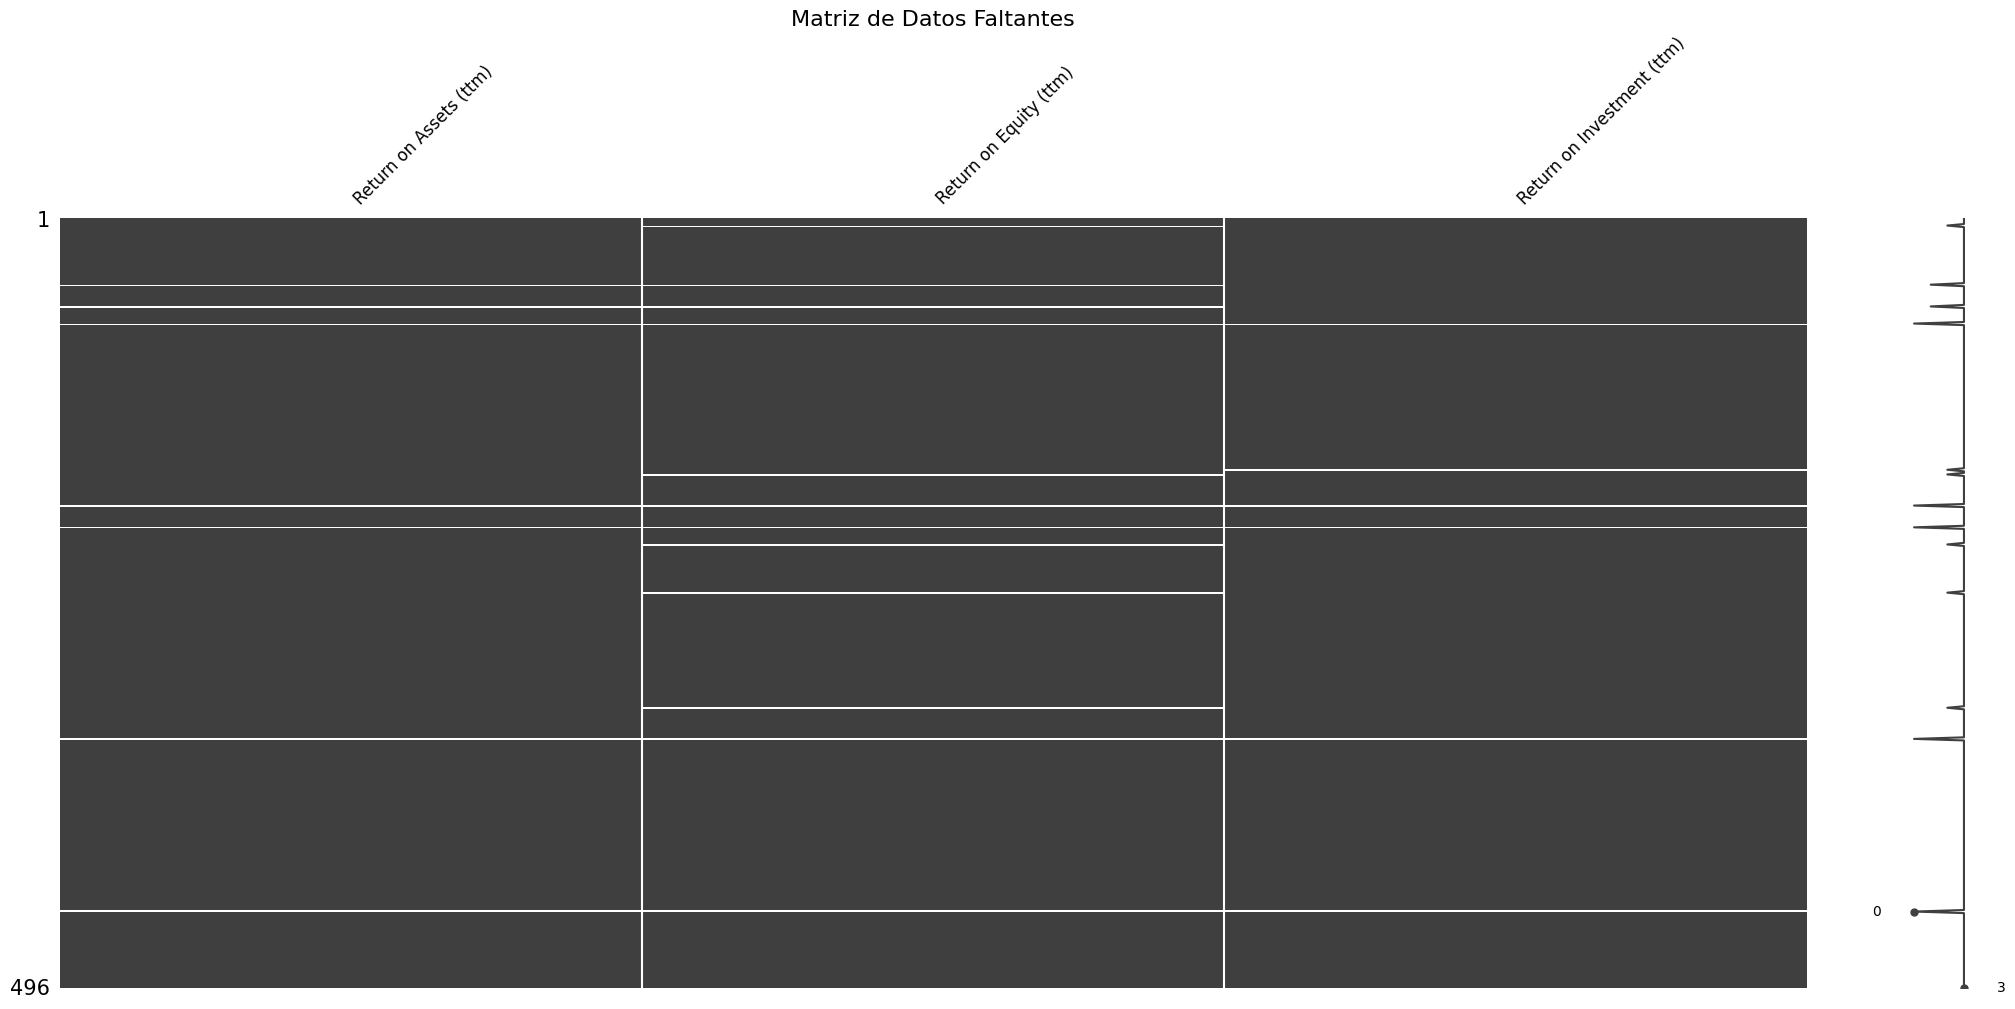

In [12]:
plt.figure(figsize=(3, 3))
msno.matrix(data, fontsize=12)
plt.title('Matriz de Datos Faltantes', fontsize=16)
plt.show()



Se nota la presencia de datos faltantes: 7 en ROA, 12 en ROE y 6 ROI, incluso hay registros en los que no se tiene ningun tipo de información sobre los retornos (7). 

In [13]:
data.describe(include='all')

,Return on Assets (ttm),Return on Equity (ttm),Return on Investment (ttm)
count,489.000000,484.000000,490.000000
mean,0.073462,0.176826,0.151571
std,0.079809,0.824657,0.208332
min,-0.325000,-8.495000,-0.455000
25%,0.026000,0.076750,0.056000
50%,0.060000,0.151000,0.115500
75%,0.116000,0.309250,0.198000
max,0.374000,9.249000,3.264000


En promedio, las empresas generan un retorno del 7.35% sobre sus activos, un 17.68% sobre su capital y un 15.16% sobre sus inversiones. Sin embargo, la desviación estándar revela una gran variabilidad, especialmente en el ROE, que tiene una desviación estándar del 82.47%, sugiriendo que hay diferencias significativas en la capacidad de las empresas para generar ganancias en relación con su capital. En cuanto a los percentiles, el 25% de las empresas tiene un ROA menor a 2.60%, mientras que el 75% tiene un ROA mayor a 11.60%, lo que indica que aunque hay empresas con bajos retornos, también hay aquellas que están muy bien gestionadas. Por otro lado, los valores máximos son impresionantes: un ROA máximo de 37.40%, un ROE de 924.90% y un ROI de 326.40% sugieren que hay empresas que han logrado un desempeño excepcional. 

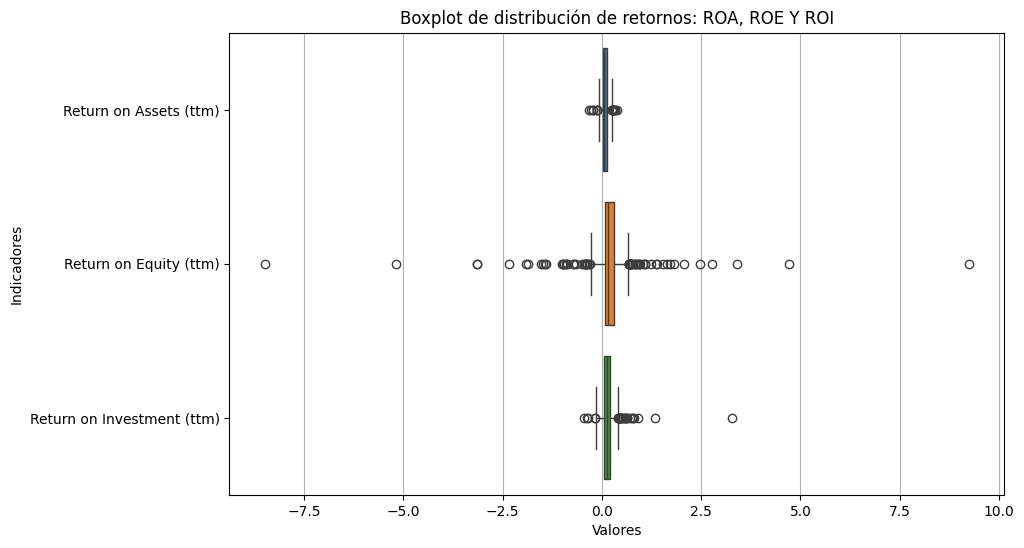

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h')
plt.title('Boxplot de distribución de retornos: ROA, ROE Y ROI')
plt.xlabel('Valores') 
plt.ylabel('Indicadores')
plt.grid(axis='x')
plt.show()

Acá se puede notar la presencia de datos atípicos, siendo más extremos en ROE, esto esperado dado lo observado en el resumen estadístico. Estos datos extremos, corresponden a un retorno sobre el capital del -850% para Seagate Technology Holdings plc (STX), empresa estadounidense de almacenamiento de dato, lo que indica que la empresa no solo no está siendo rentable, sino que está perdiendo una cantidad significativa de dinero en comparación con el capital que tienen invertido los accionistas; y a un 924.90% de ROE para APA Corporation (APA), el holding de Apache Corporation, una empresa estadounidense dedicada a la exploración de hidrocarburos, lo que sugiere que la empresa está generando ingresos netos extremadamente altos en relación con el capital aportado por los accionistas (patrimonio neto)

```{admonition} Observación
Aunque puede parecer positivo a primera vista, un ROE tan elevado suele ser una señal para investigar más a fondo las razones detrás de estos resultados. Factores como bajo patrimonio neto, uso de apalancamiento elevado, eventos excepcionales o errores en los datos pueden explicar este valor fuera de lo común.
```


In [15]:
df.sort_values(by = 'Return on Equity (ttm)', ascending= True).head(1)

,Company,Major index membership,Market capitalization,Income (ttm),Revenue (ttm),Book value per share (mrq),Cash per share (mrq),Dividend (annual),Dividend yield (annual),Full time employees,...,Performance (Quarter),Performance (Half Year),Performance (Year),Performance (Year To Date),Beta,Average True Range (14),"Volatility (Week, Month)",Previous close,Current stock price,Performance (today)
414,STX,S&P 500,13.20B,618.00M,9.35B,-2.28,3.71,2.80,4.40%,40000,...,23.81%,-1.51%,-28.64%,22.85%,1.12,2.02,2.96% 2.85%,63.63,64.63,1.57%


In [16]:
df.sort_values(by = 'Return on Equity (ttm)', ascending= False).head(1)

,Company,Major index membership,Market capitalization,Income (ttm),Revenue (ttm),Book value per share (mrq),Cash per share (mrq),Dividend (annual),Dividend yield (annual),Full time employees,...,Performance (Quarter),Performance (Half Year),Performance (Year),Performance (Year To Date),Beta,Average True Range (14),"Volatility (Week, Month)",Previous close,Current stock price,Performance (today)
38,APA,S&P 500,11.71B,3.67B,11.07B,1.36,0.81,1.00,2.60%,2273,...,-13.82%,3.10%,-2.14%,-19.01%,3.55,1.58,3.35% 3.73%,38.49,37.81,-1.78%


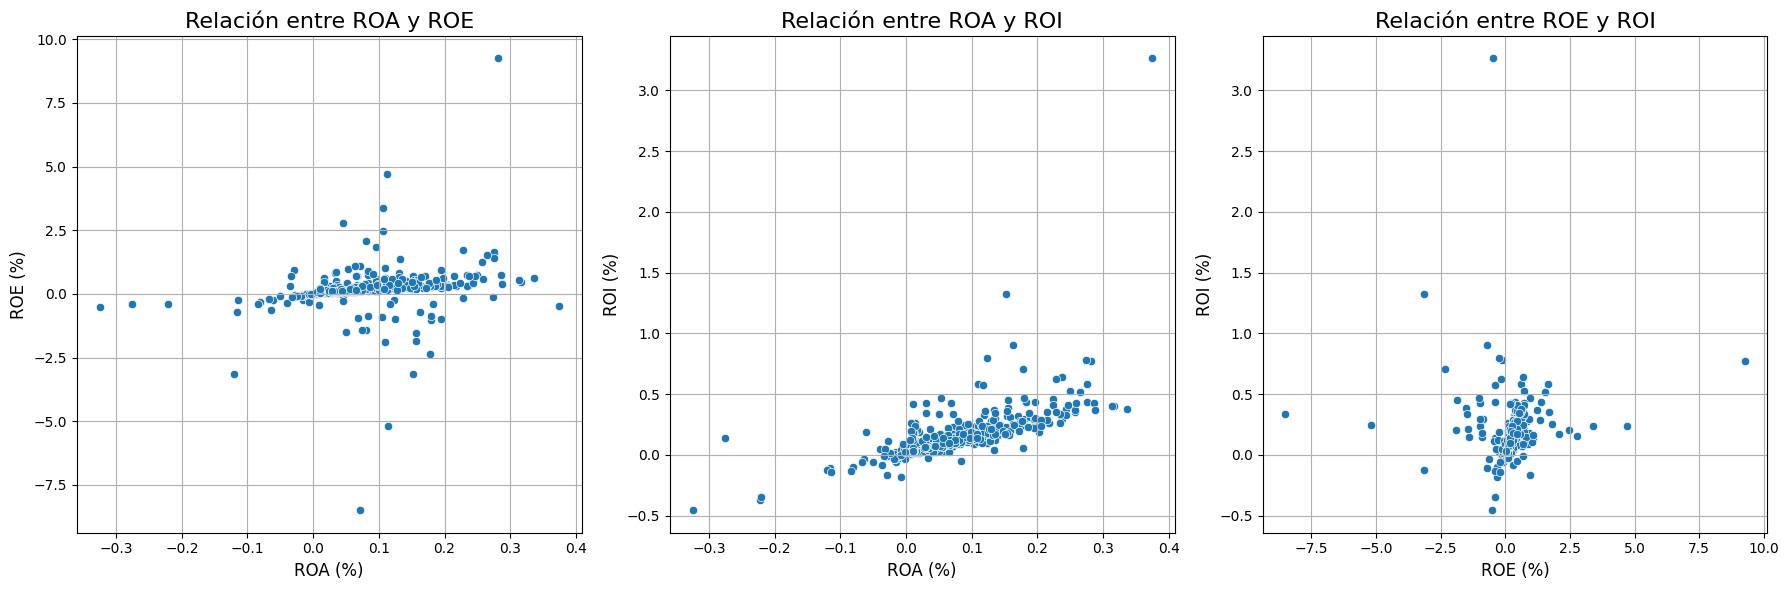

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Primer gráfico: ROA vs ROE
sns.scatterplot(data=df, x='Return on Assets (ttm)', y='Return on Equity (ttm)', ax=axes[0])
axes[0].set_title('Relación entre ROA y ROE', fontsize=16)
axes[0].set_xlabel('ROA (%)', fontsize=12)
axes[0].set_ylabel('ROE (%)', fontsize=12)
axes[0].grid(True)

# Segundo gráfico: ROA vs ROI
sns.scatterplot(data=df, x='Return on Assets (ttm)', y='Return on Investment (ttm)', ax=axes[1])
axes[1].set_title('Relación entre ROA y ROI', fontsize=16)
axes[1].set_xlabel('ROA (%)', fontsize=12)
axes[1].set_ylabel('ROI (%)', fontsize=12)
axes[1].grid(True)

# Tercer gráfico: ROE vs ROI
sns.scatterplot(data=df, x='Return on Equity (ttm)', y='Return on Investment (ttm)', ax=axes[2])
axes[2].set_title('Relación entre ROE y ROI', fontsize=16)
axes[2].set_xlabel('ROE (%)', fontsize=12)
axes[2].set_ylabel('ROI (%)', fontsize=12)
axes[2].grid(True)

plt.tight_layout()

plt.show()

No parece haber una relación lineal entre ROA y ROE ni entre ROI y ROE, sin embargo, sí que parece haber una especie de correlación positiva entre ROA y ROI.

<Axes: >

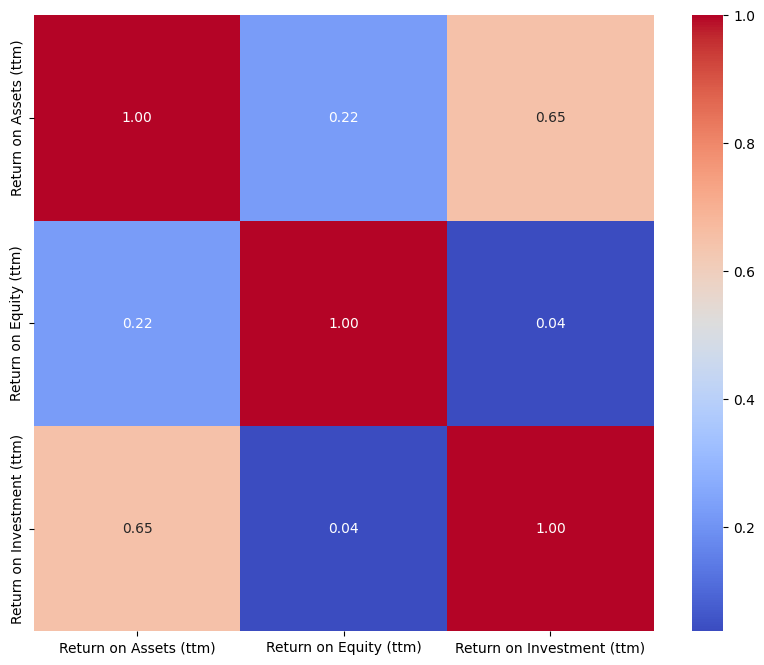

In [18]:
matriz_correlacion = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")

Esto se confirma con la matriz de correlación, donde ROA y ROI cuentan con un coeficiente de correlación de 0.65.

### Márgenes

Los márgenes financieros son indicadores clave que miden la rentabilidad de una empresa en diferentes etapas de su operación. Los tres márgenes más comunes son el margen bruto, el margen operativo y el margen neto de utilidades. Estos márgenes muestran cuánta ganancia genera una empresa en relación con sus ingresos en distintas fases del ciclo de negocio.

- El **margen bruto** o `gross margin` mide la rentabilidad desde el punto de vista de la producción. Un margen bruto más alto indica que la empresa tiene control sobre sus costos directos de producción, lo que le permite generar más ganancias por cada unidad de venta. Este margen refleja la eficiencia en la producción.
$$\text{Margen bruto} = \frac{\text{Ventas netas} - \text{Costo de ventas}}{\text{Ventas netas}} * 100$$
- El **margen operativo** o `operating margin` va un paso más allá, considerando los gastos operativos y cómo afectan la rentabilidad. Un margen operativo alto indica que la empresa genera suficientes ingresos para cubrir sus costos operativos y aún dejar ganancias antes de considerar los costos financieros. Un margen bajo sugiere que la empresa tiene dificultades para gestionar sus gastos operativos.
$$\text{Margen operativo} = \frac{\text{Ingresos operativos}}{\text{Ventas netas}} * 100$$
- El **margen neto de utilidades** o `net profit margin` es el indicador más completo, ya que refleja las ganancias finales tras todos los costos y responsabilidades financieras. Este margen refleja la capacidad de la empresa para generar beneficios finales después de todos los costos. Un margen neto alto indica una buena gestión financiera y una estructura de costos eficiente. Un margen neto bajo puede sugerir que los costos financieros o impositivos están afectando la rentabilidad de la empresa.
$$\text{Margen neto de utilidades} = \frac{\text{Ingreso neto}}{\text{Ventas netas}} * 100$$



In [19]:
for col in ['Gross Margin (ttm)', 'Operating Margin (ttm)', 'Net Profit Margin (ttm)']:
    df[col] = df[col].apply(lambda x: float(x.strip('%')) / 100 if isinstance(x, str) and '%' in x else (float(x) if pd.notnull(x) else x))

data = df[['Gross Margin (ttm)', 'Operating Margin (ttm)', 'Net Profit Margin (ttm)']]


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gross Margin (ttm)       425 non-null    float64
 1   Operating Margin (ttm)   487 non-null    float64
 2   Net Profit Margin (ttm)  487 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


<Figure size 300x300 with 0 Axes>

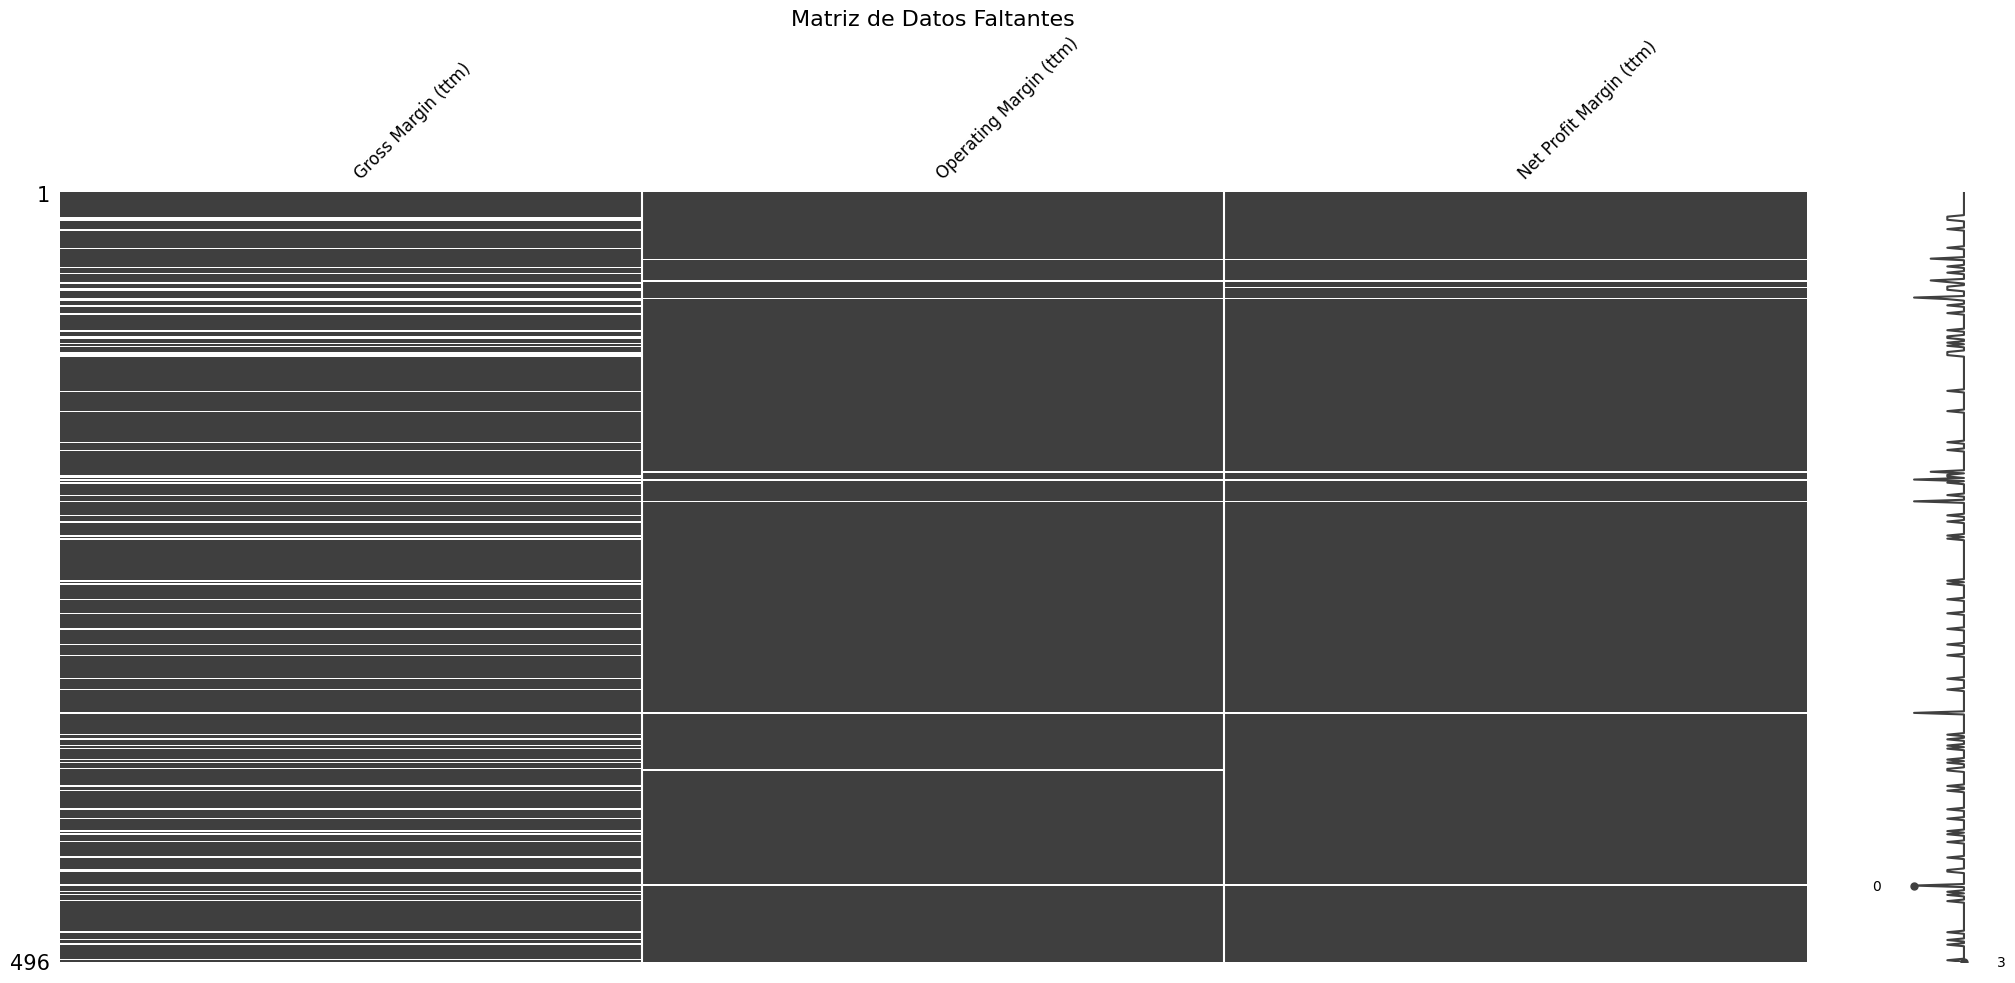

In [21]:
plt.figure(figsize=(3, 3))
msno.matrix(data, fontsize=12)
plt.title('Matriz de Datos Faltantes', fontsize=16)
plt.show()

Se destaca la presencia de 71 datos faltantes en el margen bruto y 9 datos faltantes en margen operativo y de margen neto de utilidades.

In [22]:
data.describe()

,Gross Margin (ttm),Operating Margin (ttm),Net Profit Margin (ttm)
count,425.000000,487.000000,487.000000
mean,0.480659,0.202117,0.139333
std,0.215113,0.191414,0.149150
min,0.034000,-0.912000,-0.961000
25%,0.313000,0.098500,0.063500
50%,0.449000,0.167000,0.122000
75%,0.655000,0.268000,0.201500
max,0.997000,0.900000,0.990000



Los datos indican que, en promedio, las empresas retienen un margen bruto del 48.07%, lo que refleja una sólida eficiencia en la gestión de los costos directos de producción. Sin embargo, el margen operativo, que incluye otros costos como salarios y gastos administrativos, se reduce al 20.21%, lo que muestra que gran parte de los ingresos se consumen en la operación diaria. Finalmente, el margen neto de utilidades es del 13.93%, lo que implica que, tras cubrir todos los costos (incluidos impuestos e intereses), las empresas generan una ganancia modesta. 

La alta dispersión en estos datos es evidente con valores mínimos negativos: algunas empresas tienen márgenes operativos tan bajos como -91.2% y márgenes netos de hasta -96.1%, lo que refleja pérdidas operativas o financieras extremas. En contraste, otras empresas alcanzan márgenes cercanos al 99%, lo que sugiere un control excepcional de los costos y una rentabilidad sobresaliente.

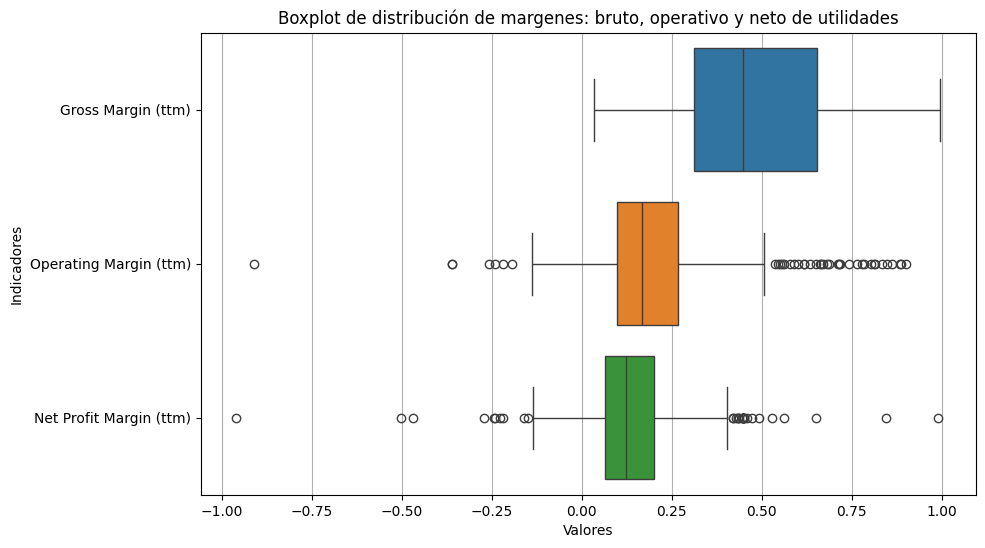

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h')
plt.title('Boxplot de distribución de margenes: bruto, operativo y neto de utilidades')
plt.xlabel('Valores') 
plt.ylabel('Indicadores')
plt.grid(axis='x')
plt.show()

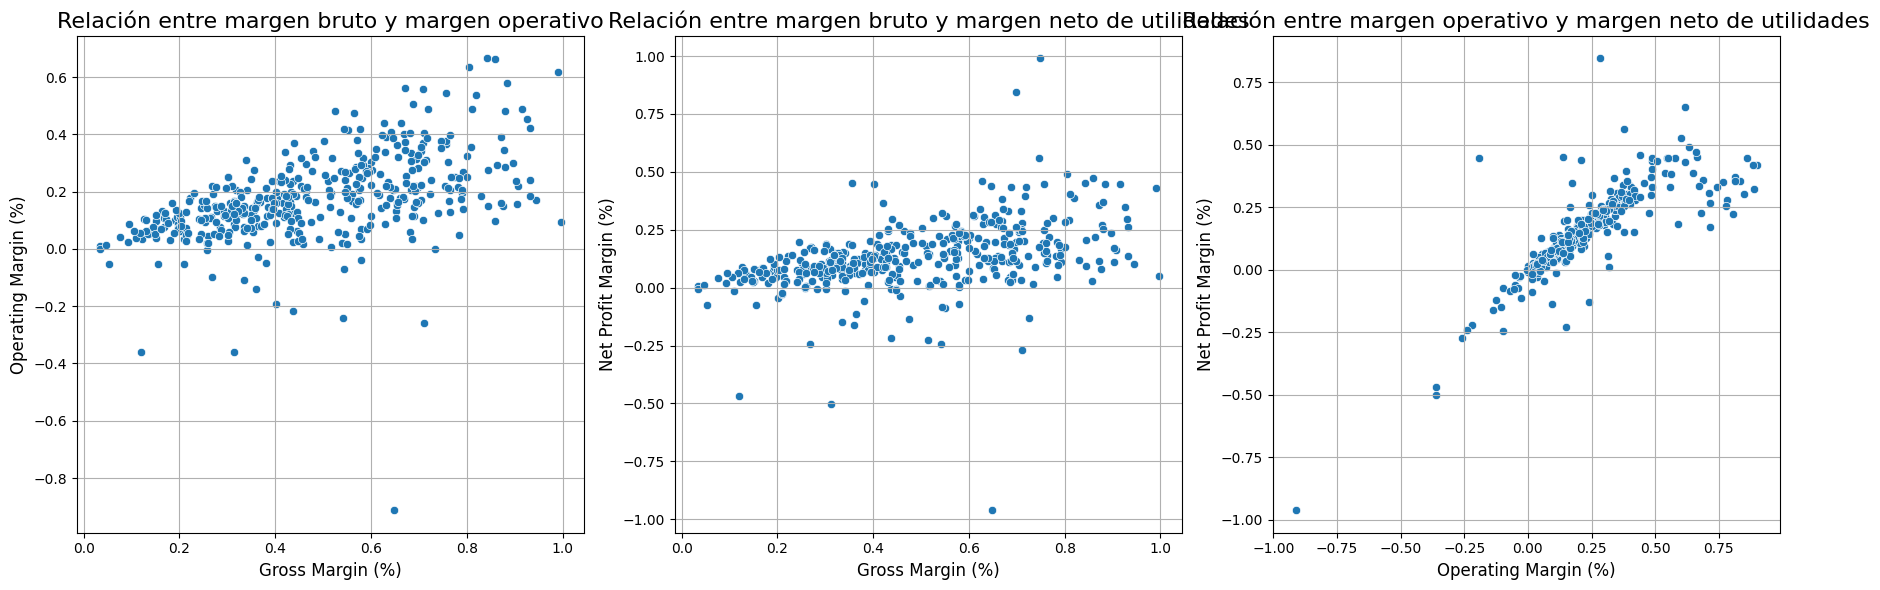

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Primer gráfico: gross vs operating
sns.scatterplot(data=df, x='Gross Margin (ttm)', y='Operating Margin (ttm)', ax=axes[0])
axes[0].set_title('Relación entre margen bruto y margen operativo', fontsize=16)
axes[0].set_xlabel('Gross Margin (%)', fontsize=12)
axes[0].set_ylabel('Operating Margin (%)', fontsize=12)
axes[0].grid(True)

# Segundo gráfico: gross vs net profit
sns.scatterplot(data=df, x='Gross Margin (ttm)', y='Net Profit Margin (ttm)', ax=axes[1])
axes[1].set_title('Relación entre margen bruto y margen neto de utilidades', fontsize=16)
axes[1].set_xlabel('Gross Margin (%)', fontsize=12)
axes[1].set_ylabel('Net Profit Margin (%)', fontsize=12)
axes[1].grid(True)

# Tercer gráfico: operating vs net profit
sns.scatterplot(data=df, x='Operating Margin (ttm)', y='Net Profit Margin (ttm)', ax=axes[2])
axes[2].set_title('Relación entre margen operativo y margen neto de utilidades', fontsize=16)
axes[2].set_xlabel('Operating Margin (%)', fontsize=12)
axes[2].set_ylabel('Net Profit Margin (%)', fontsize=12)
axes[2].grid(True)


plt.tight_layout()

plt.show()

Se puede notar un alta correlación entre el margen operativo y el margen neto de utilidad, lo cual es confirmado al realizar la matriz de correlación, la cual arroja un del coeficiente de correlación de 0.82. Valores menores como 0.51 y 0.42 se obtienen del margen bruto - margen operativo y margen bruto - neto de utilidad respectivamente.

<Axes: >

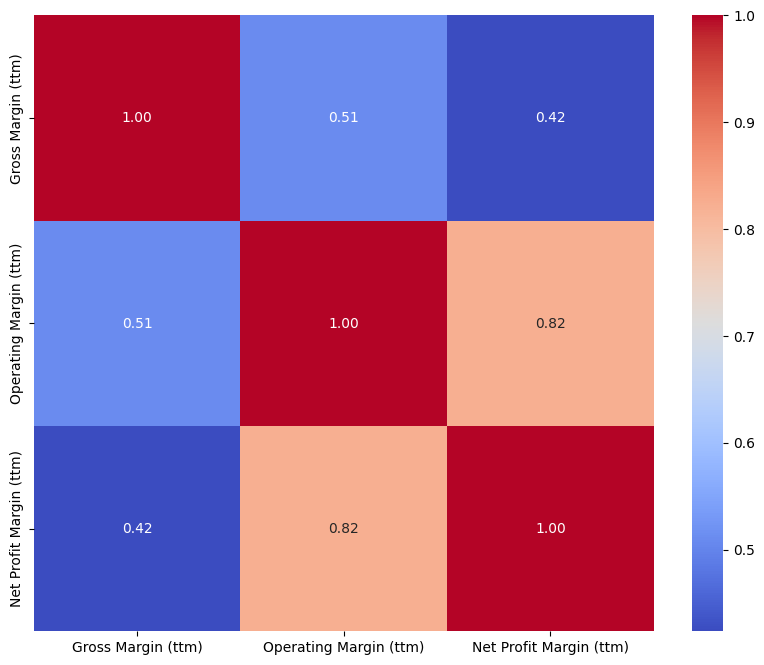

In [25]:
matriz_correlacion = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")

### Ganancias e ingresos

La variable `Revenue (ttm)` representa las ganancias que las distintas empresas generan por la venta de bienes y servicios en los últimos 12 meses. Es una de las métricas más fundamentales para evaluar la salud financiera de una empresa. Un aumento constante en el `Revenue (ttm)` puede indicar un crecimiento sólido en la demanda de productos o servicios, una estrategia de marketing efectiva y una gestión eficiente.

Por otro lado, la variable `Income (ttm)` representa las ganancias netas que una empresa ha generado en los últimos 12 meses. Esta métrica es esencial para evaluar la rentabilidad y la salud financiera de una empresa, ya que muestra lo que queda después de deducir todos los costos, gastos e impuestos de los ingresos totales. Un aumento constante en los ingresos puede indicar un desempeño sólido, una gestión eficiente de costos y una capacidad efectiva para generar beneficios a partir de las ventas.

In [26]:
df['Revenue (ttm)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 496 entries, 0 to 495
Series name: Revenue (ttm)
Non-Null Count  Dtype 
--------------  ----- 
496 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


In [27]:
df['Income (ttm)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 496 entries, 0 to 495
Series name: Income (ttm)
Non-Null Count  Dtype 
--------------  ----- 
491 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


No hay ganancias faltantes pero existen 5 empresas sin información de los ingresos. 

In [28]:
df['Revenue (ttm)'] = df['Revenue (ttm)'].apply(clean_mb)
df['Income (ttm)'] = df['Income (ttm)'].apply(clean_mb)


In [29]:
pd.DataFrame(df[['Revenue (ttm)', 'Income (ttm)']].describe(include='all'))

,Revenue (ttm),Income (ttm)
count,4.960000e+02,4.910000e+02
mean,3.166717e+10,3.134273e+09
std,6.219970e+10,7.701913e+09
min,7.183000e+08,-1.672000e+10
25%,5.830000e+09,5.825000e+08
50%,1.266500e+10,1.200000e+09
75%,2.719000e+10,3.150000e+09
max,6.112900e+11,9.517000e+10


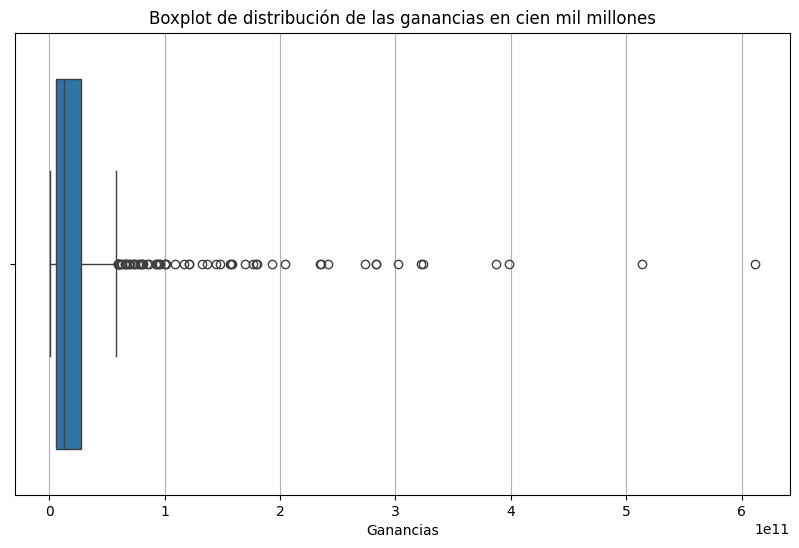

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Revenue (ttm)'], orient='h')
plt.title('Boxplot de distribución de las ganancias en cien mil millones')
plt.xlabel('Ganancias') 
plt.ylabel('')
plt.grid(axis='x')
plt.show()

Las ganancias promedio son de aproximadamente 31.67 mil millones, indicando que muchas empresas generan ganancias significativas. Sin embargo, la desviación estándar de 62.20 mil millones sugiere una alta variabilidad, lo que implica la existencia de algunas empresas mucho más grandes que dominan el mercado. El mínimo es de 718.3 millones y el máximo alcanza 611.29 mil millones, reflejando una notable diferencia entre las empresas con menores y mayores ganancias. Los percentiles 25 y 75 (5.83 y 27.19 mil millones, respectivamente) indican que el 25% superior de las empresas genera considerablemente más que la mayoría. En conjunto, estos datos revelan un entorno empresarial diverso con una mezcla de empresas pequeñas y grandes.

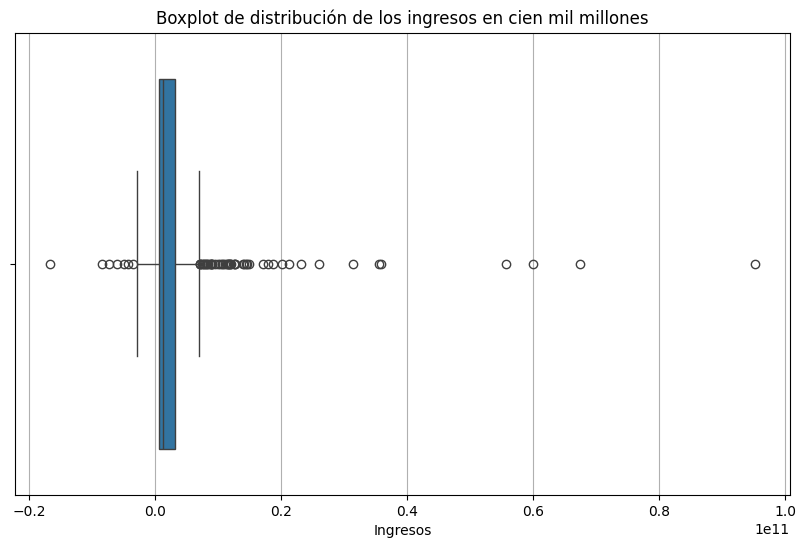

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Income (ttm)'], orient='h')
plt.title('Boxplot de distribución de los ingresos en cien mil millones')
plt.xlabel('Ingresos') 
plt.ylabel('')
plt.grid(axis='x')
plt.show()

El ingreso promedio de las empresas es de aproximadamente 3.13 mil millones, lo que indica que, en general, las empresas generan ganancias importantes. Sin embargo, la desviación estándar de 7.70 mil millones sugiere una alta variabilidad entre las empresas, lo que significa que algunas generan significativamente más o menos ingresos. El valor mínimo es de -16.72 mil millones, lo que indica que algunas empresas reportaron pérdidas considerables, mientras que el valor máximo es de 95.17 mil millones, lo que refleja la presencia de empresas con enormes ganancias. El percentil 25 es de 582.5 millones y el percentil 75 es de 3.15 mil millones, lo que indica que el 25% superior de las empresas genera notablemente más ganancias que el resto. Estos datos muestran una amplia dispersión en la rentabilidad, con una mezcla de empresas con bajos ingresos y otras con ganancias muy altas.

### Ganancias diluidas por acción

Esta es una medida financiera que indica la cantidad de ganancias atribuibles a cada acción ordinaria en circulación de una empresa, teniendo en cuenta la dilución que podría ocurrir si todas las opciones sobre acciones, bonos convertibles y otros instrumentos que podrían convertirse en acciones se ejercieran. El EPS diluido proporciona una visión más conservadora de las ganancias por acción, ya que considera la posible dilución de las acciones. Esto es particularmente relevante para los inversionistas, ya que permite evaluar el impacto de futuras emisiones de acciones en la rentabilidad por acción.

In [32]:
def convert_to_float(x):
    try:
        return float(x) if pd.notnull(x) else x
    except ValueError:
        return None


In [33]:
df['Diluted EPS (ttm)'] = df['Diluted EPS (ttm)'].apply(convert_to_float)

df['Diluted EPS (ttm)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 496 entries, 0 to 495
Series name: Diluted EPS (ttm)
Non-Null Count  Dtype  
--------------  -----  
495 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


Se destaca la presencia de solo un dato faltante.

In [34]:
df['Diluted EPS (ttm)'].describe()

count    495.000000
mean       7.338667
std       24.617692
min     -121.140000
25%        2.075000
50%        4.500000
75%        8.265000
max      492.330000
Name: Diluted EPS (ttm), dtype: float64

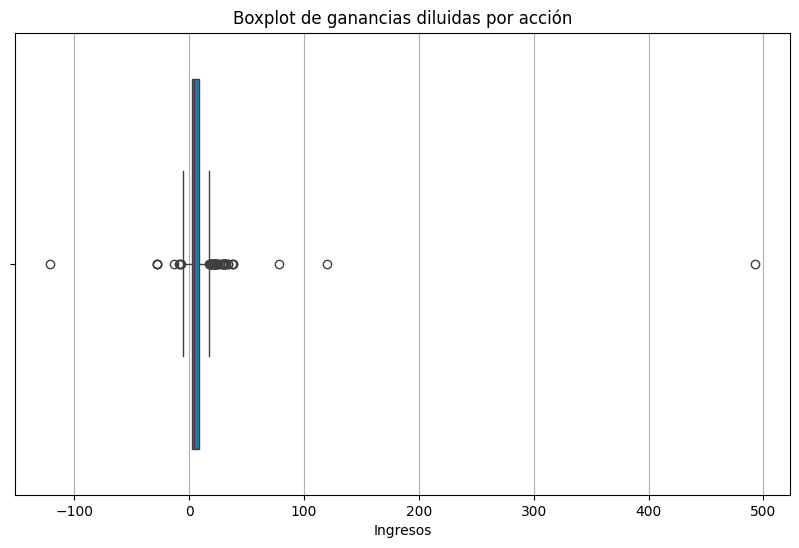

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Diluted EPS (ttm)'], orient='h')
plt.title('Boxplot de ganancias diluidas por acción')
plt.xlabel('Ingresos') 
plt.ylabel('')
plt.grid(axis='x')
plt.show()

El ingreso promedio por acción diluida (EPS) es de aproximadamente 7.34, lo que sugiere que muchas empresas generan ganancias modestas por acción. Sin embargo, la desviación estándar de 24.62 indica una alta variabilidad, lo que implica que existen algunas empresas con ganancias por acción significativamente más altas o, en algunos casos, negativas. El mínimo es de -121.14, lo que refleja que hay empresas que han experimentado pérdidas considerables, mientras que el máximo alcanza 492.33, mostrando una notable diferencia entre las empresas con menores y mayores EPS. Los percentiles 25 y 75 (2.08 y 8.27, respectivamente) indican que el 25% superior de las empresas genera ganancias por acción considerablemente más altas que la mayoría. En conjunto, estos datos revelan un entorno empresarial diverso, con una mezcla de empresas que obtienen ganancias modestas, algunas con pérdidas y otras con resultados excepcionales.

### Crecimiento de EPS

El crecimiento del EPS (earnings per share, o ganancias por acción) es un indicador financiero crucial que refleja la capacidad de una empresa para generar ganancias en relación con el número de acciones en circulación. Este indicador se utiliza ampliamente por inversionistas y analistas para evaluar la rentabilidad y el rendimiento de una empresa. El EPS se calcula dividiendo las ganancias netas de una empresa, menos las ganancias preferentes, entre el número promedio de acciones en circulación, es decir:

$$\textup{Crecimiento del EPS} = \frac{\textup{EPS de periodo actual} - \textup{EPS del periodo anterior}}{\textup{EPS del periodo anterior}} * 100$$

Un crecimiento positivo del EPS indica que la empresa está aumentando sus ganancias, lo que suele ser un buen signo para los inversionistas.

En el dataframe se cuenta con el crecimiento de EPS de este año, crecimiento de EPS del próximo año, un estimado del crecimiento EPS para el siguiente y el crecimiento EPS estimado para el siguiente rimestre.

In [36]:
interes = ['EPS estimate for next quarter','EPS estimate for next year', 'EPS growth next year', 'EPS growth this year']

for col in interes:
    df[col] = df[col].apply(lambda x: float(x.strip('%')) / 100 if isinstance(x, str) and '%' in x else (float(x) if pd.notnull(x) else x))

data = df[interes]

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   EPS estimate for next quarter  493 non-null    float64
 1   EPS estimate for next year     493 non-null    float64
 2   EPS growth next year           493 non-null    float64
 3   EPS growth this year           493 non-null    float64
dtypes: float64(4)
memory usage: 15.6 KB


Existen tres datos faltantes por cada crecimiento de EPS.

<Figure size 300x300 with 0 Axes>

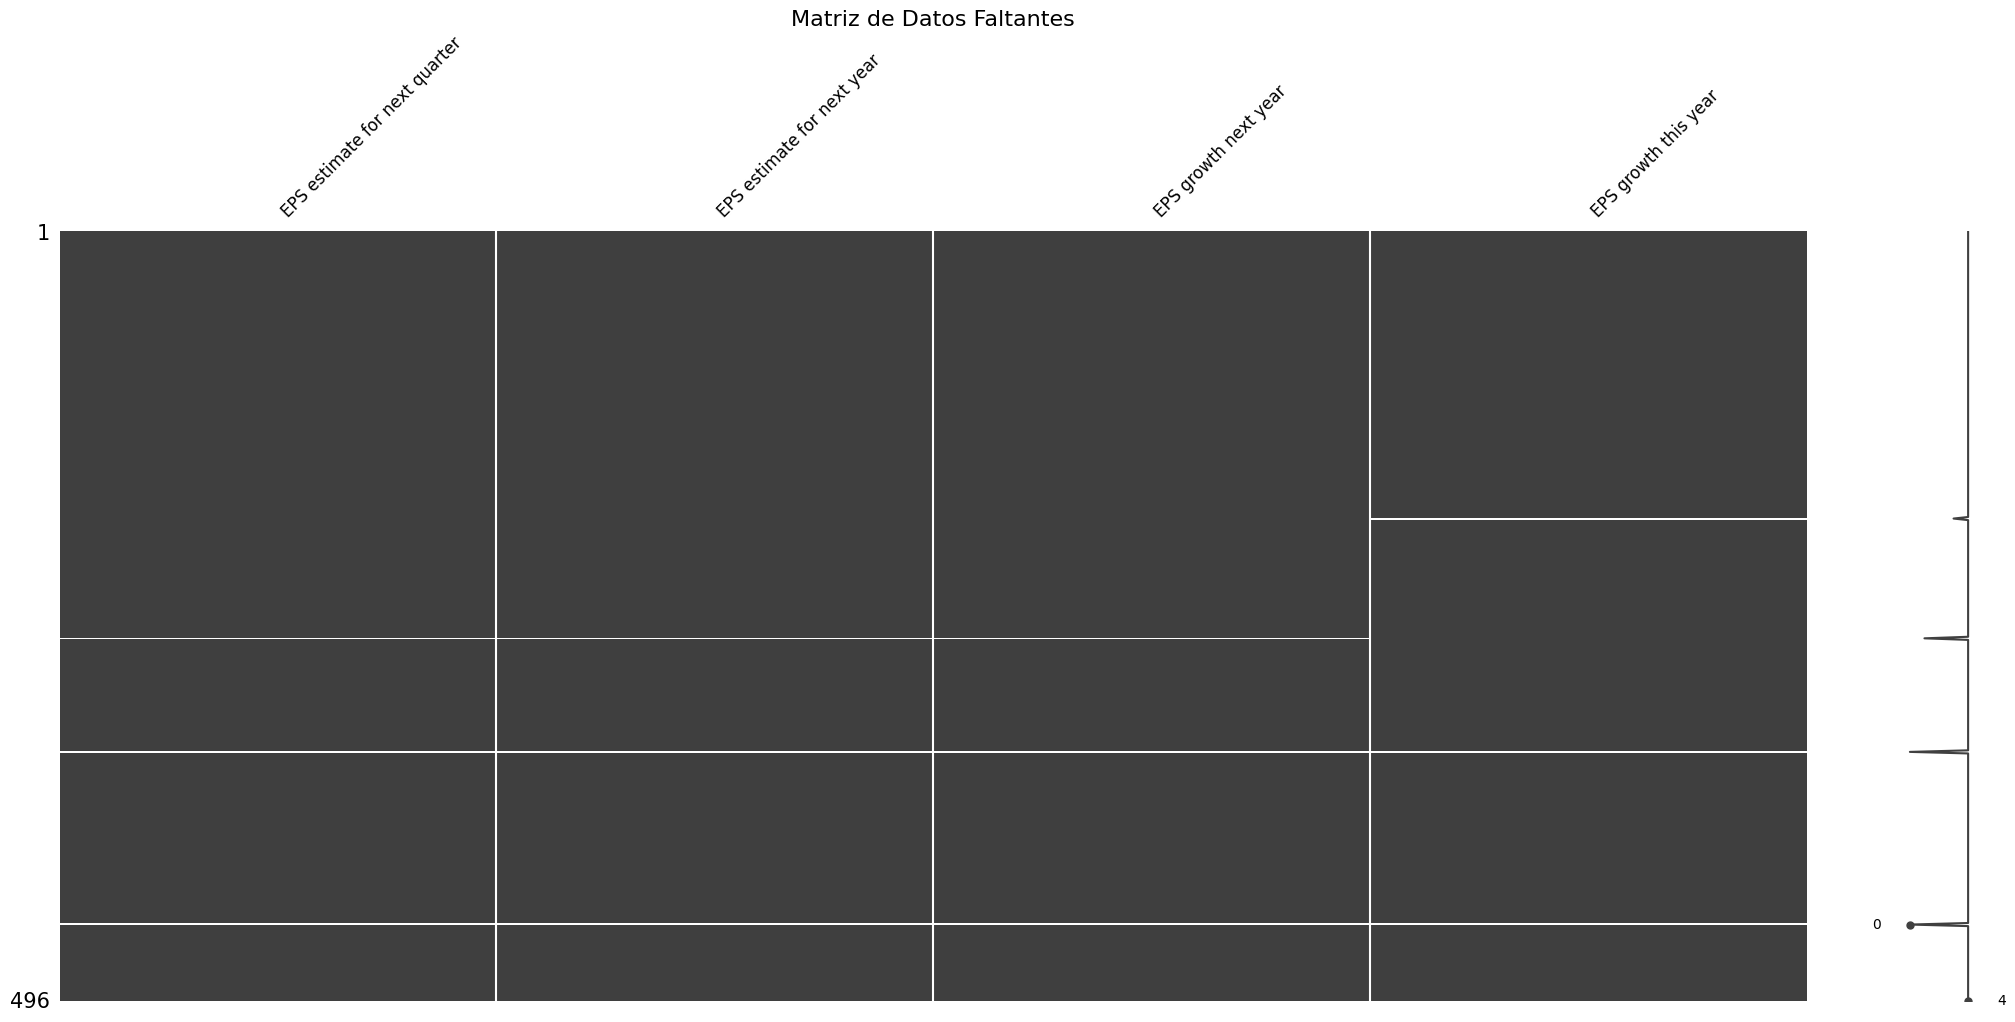

In [38]:
plt.figure(figsize=(3, 3))
msno.matrix(data, fontsize=12)
plt.title('Matriz de Datos Faltantes', fontsize=16)
plt.show()

Se observa que en dos empresas no se se tiene infromación sobre ninguno de los crecimientos de EPS, en otra no se tiene información del EPS estimado para el siguiente trimestre y año y el crecimiento para el siguiente año, y por último, una empresa no se tiene información del crecimiento de este año.

In [39]:
data.describe()

,EPS estimate for next quarter,EPS estimate for next year,EPS growth next year,EPS growth this year
count,493.000000,493.000000,493.000000,493.000000
mean,2.064604,10.098641,0.259849,0.094517
std,4.547388,19.972680,1.164447,1.143340
min,-1.550000,-3.330000,-0.489000,-7.642000
25%,0.670000,3.820000,0.070900,-0.242000
50%,1.320000,6.430000,0.109900,0.043000
75%,2.340000,11.320000,0.168400,0.319000
max,88.960000,363.320000,17.000000,6.839000


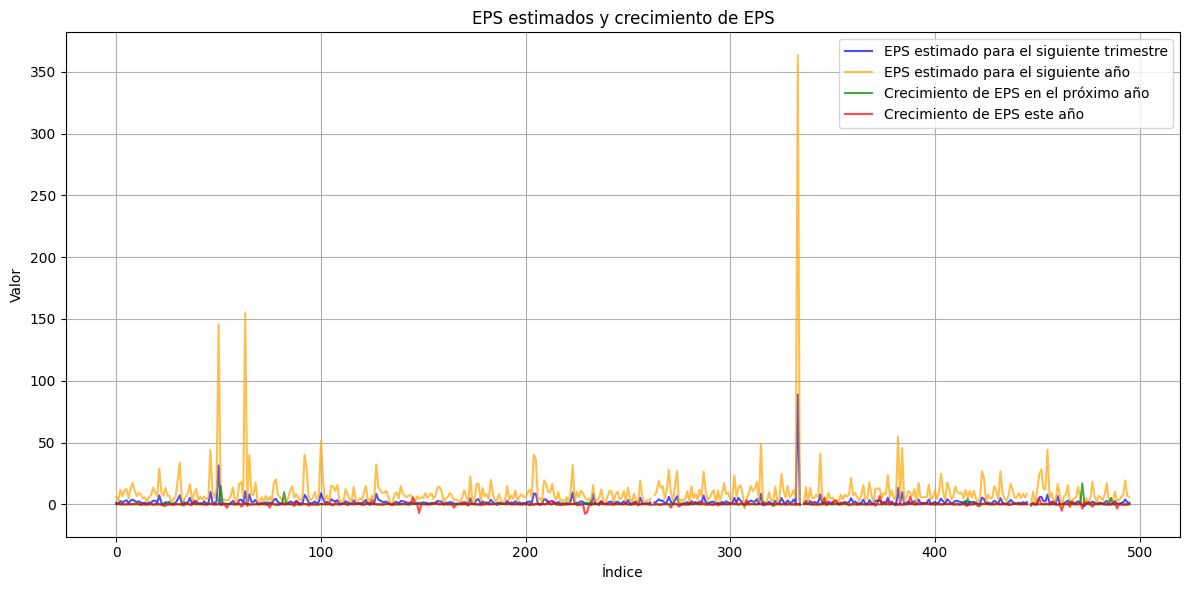

In [40]:
plt.figure(figsize=(12, 6))

plt.plot(df['EPS estimate for next quarter'], label='EPS estimado para el siguiente trimestre', color='blue', alpha=0.7)
plt.plot(df['EPS estimate for next year'], label='EPS estimado para el siguiente año', color='orange', alpha=0.7)
plt.plot(df['EPS growth next year'], label='Crecimiento de EPS en el próximo año', color='green', alpha=0.7)
plt.plot(df['EPS growth this year'], label='Crecimiento de EPS este año', color='red', alpha=0.7)

plt.title('EPS estimados y crecimiento de EPS')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Los datos sobre las estimaciones de EPS y el crecimiento reflejan un rango amplio de expectativas y variabilidad. La estimación promedio de EPS para el próximo trimestre es de aproximadamente 2.06, mientras que la estimación para el próximo año es significativamente mayor, alcanzando un promedio de 10.10. Esto sugiere que los analistas anticipan un aumento considerable en las ganancias a medida que se proyecta hacia el futuro. Sin embargo, la alta desviación estándar de 4.55 para el EPS del próximo trimestre y de 19.97 para el EPS del próximo año indica una notable variabilidad en las estimaciones, lo que implica que algunos analistas esperan resultados mucho más altos o más bajos que la media.

El crecimiento esperado del EPS para el próximo año muestra un promedio de aproximadamente 0.26%, con un crecimiento más modesto del 9.45% para este año. La desviación estándar de 1.16 y 1.14, respectivamente, sugiere que existe un rango considerable en las expectativas de crecimiento, evidenciado por los valores mínimos negativos, que indican que algunos analistas prevén caídas en el EPS, mientras que los valores máximos alcanzan 17.00 y 6.84, respectivamente, sugiriendo que otros anticipan crecimientos robustos. Los percentiles también revelan una distribución asimétrica: el 25% de las estimaciones para el crecimiento del EPS este año son negativas, lo que indica que una parte de las empresas enfrenta desafíos significativos, mientras que el 75% restante proyecta un crecimiento moderado. En conjunto, estos datos sugieren un panorama de ganancias en el que, aunque hay optimismo sobre el crecimiento futuro, persisten importantes diferencias en las expectativas entre las empresas.

## Otras variables

### Ratios financieros

Dentro de las variables encontramos varios **ratios financieros**, los cuales son herramientas esenciales para evaluar la salud y el rendimiento de una empresa. El **Precio a ganancias (P/E)** y el **Precio a ganancias proyectado (Forward P/E)** comparan el precio de la acción con las ganancias actuales y proyectadas, respectivamente, ayudando a determinar si la acción está sobrevalorada o subvalorada. El **Precio a libro (P/B)** y el **Precio a ventas (P/S)** analizan el valor contable y las ventas, brindando una perspectiva sobre el valor intrínseco de la empresa. Por otro lado, el **Precio a flujo de caja libre (P/FCF)** se enfoca en el flujo de caja libre, crucial para entender la generación de efectivo. En cuanto a la deuda, la relación **deuda/capital (Debt/Eq)** y la **relación deuda a largo plazo/capital (LT Debt/Eq)** permiten evaluar la estructura de capital y el riesgo asociado con el financiamiento. Finalmente, el **ratio rápido (Quick Ratio)** y el **ratio corriente (Current Ratio)** ofrecen una visión de la liquidez a corto plazo, indicando la capacidad de la empresa para cumplir con sus obligaciones inmediatas. En conjunto, estos ratios proporcionan una visión integral del desempeño y la solidez financiera de una empresa, lo que facilita la toma de decisiones informadas.



In [41]:
interes = ["Price-to-Earnings (ttm)",
    "Forward Price-to-Earnings (next fiscal year)",
    "Price-to-Book (mrq)",
    "Price-to-Sales (ttm)",
    "Price to Free Cash Flow (ttm)",
    "Total Debt to Equity (mrq)",
    "Long Term Debt to Equity (mrq)",
    "Quick Ratio (mrq)",
    "Current Ratio (mrq)"]

for col in interes:
    df[col] = df[col].apply(lambda x: float(x.strip('%')) / 100 if isinstance(x, str) and '%' in x else (float(x) if pd.notnull(x) else x))

data = df[interes]

In [42]:
data.describe()

,Price-to-Earnings (ttm),Forward Price-to-Earnings (next fiscal year),Price-to-Book (mrq),Price-to-Sales (ttm),Price to Free Cash Flow (ttm),Total Debt to Equity (mrq),Long Term Debt to Equity (mrq),Quick Ratio (mrq),Current Ratio (mrq)
count,457.000000,491.000000,462.000000,496.000000,406.000000,458.000000,458.000000,406.000000,407.000000
mean,33.719015,19.129674,11.038831,3.645141,61.108744,2.229192,2.000197,1.175862,1.540541
std,60.057916,17.926697,66.187037,3.335920,145.550041,10.621333,9.896347,0.802778,0.954457
min,3.100000,3.070000,0.290000,0.100000,1.300000,0.000000,0.000000,0.100000,0.300000
25%,15.120000,11.540000,1.900000,1.310000,13.957500,0.390000,0.400000,0.700000,0.900000
50%,22.700000,16.470000,3.290000,2.645000,31.370000,0.705000,0.675000,1.000000,1.300000
75%,33.170000,22.125000,6.547500,4.655000,53.202500,1.450000,1.280000,1.400000,1.800000
max,888.110000,342.790000,1330.570000,21.610000,1887.450000,198.560000,184.120000,5.400000,7.200000


En general, el Precio a ganancias (P/E) tiene un valor promedio de aproximadamente 33.72, con una alta desviación estándar de 60.06, lo que indica una gran variabilidad en las valoraciones de las acciones, desde un mínimo de 3.10 hasta un máximo notable de 888.11. Esto sugiere que algunas empresas están significativamente sobrevaloradas en comparación con otras. El Forward Price-to-Earnings (next fiscal year) presenta un promedio de 19.13, también con una desviación estándar considerable de 17.93, lo que indica una diversidad en las expectativas de ganancias futuras entre las empresas, con un rango de 3.07 a 342.79. En cuanto al Precio a libro (P/B), el promedio es de 11.04, con una alta dispersión (desviación estándar de 66.19), evidenciando que algunas empresas tienen un valor contable considerablemente menor o mayor en relación con su precio de acción. El Precio a ventas (P/S), con un promedio de 3.65, también muestra variabilidad, con un rango que va de 0.10 a 21.61, lo que sugiere diferencias significativas en la rentabilidad de las ventas entre las empresas. El Precio a flujo de caja libre (P/FCF) tiene un promedio de 61.11, con una desviación estándar de 145.55, lo que implica que algunas empresas generan mucho más flujo de caja libre en comparación con otras. La relación deuda/capital (Debt/Eq) tiene un promedio de 2.23, sugiriendo que, en promedio, las empresas tienen más de dos veces su capital en deuda, mientras que el Long Term Debt to Equity (LT Debt/Eq), con un promedio de 2.00, indica que la deuda a largo plazo es comparable. Los ratios de liquidez como el Quick Ratio (mrq) y el Current Ratio (mrq) muestran promedios de 1.18 y 1.54, respectivamente, lo que sugiere que, en promedio, las empresas tienen suficiente liquidez para cubrir sus obligaciones a corto plazo, aunque la variabilidad en estos ratios (0.80 y 0.95 de desviación estándar) sugiere que algunas empresas pueden enfrentar problemas de liquidez.

Dentro de las variables restantes que pueden ser encontradas en el dataframe, se observan indicadores de volatilidad y riesgo, liquidez y solvencia, y tendencias y medias móviles, además de desempeño histórico y propiedad y transacciones internas que no son relevantes para el objetivo de este trabajo.

## Correlación de variables de interés

<Axes: >

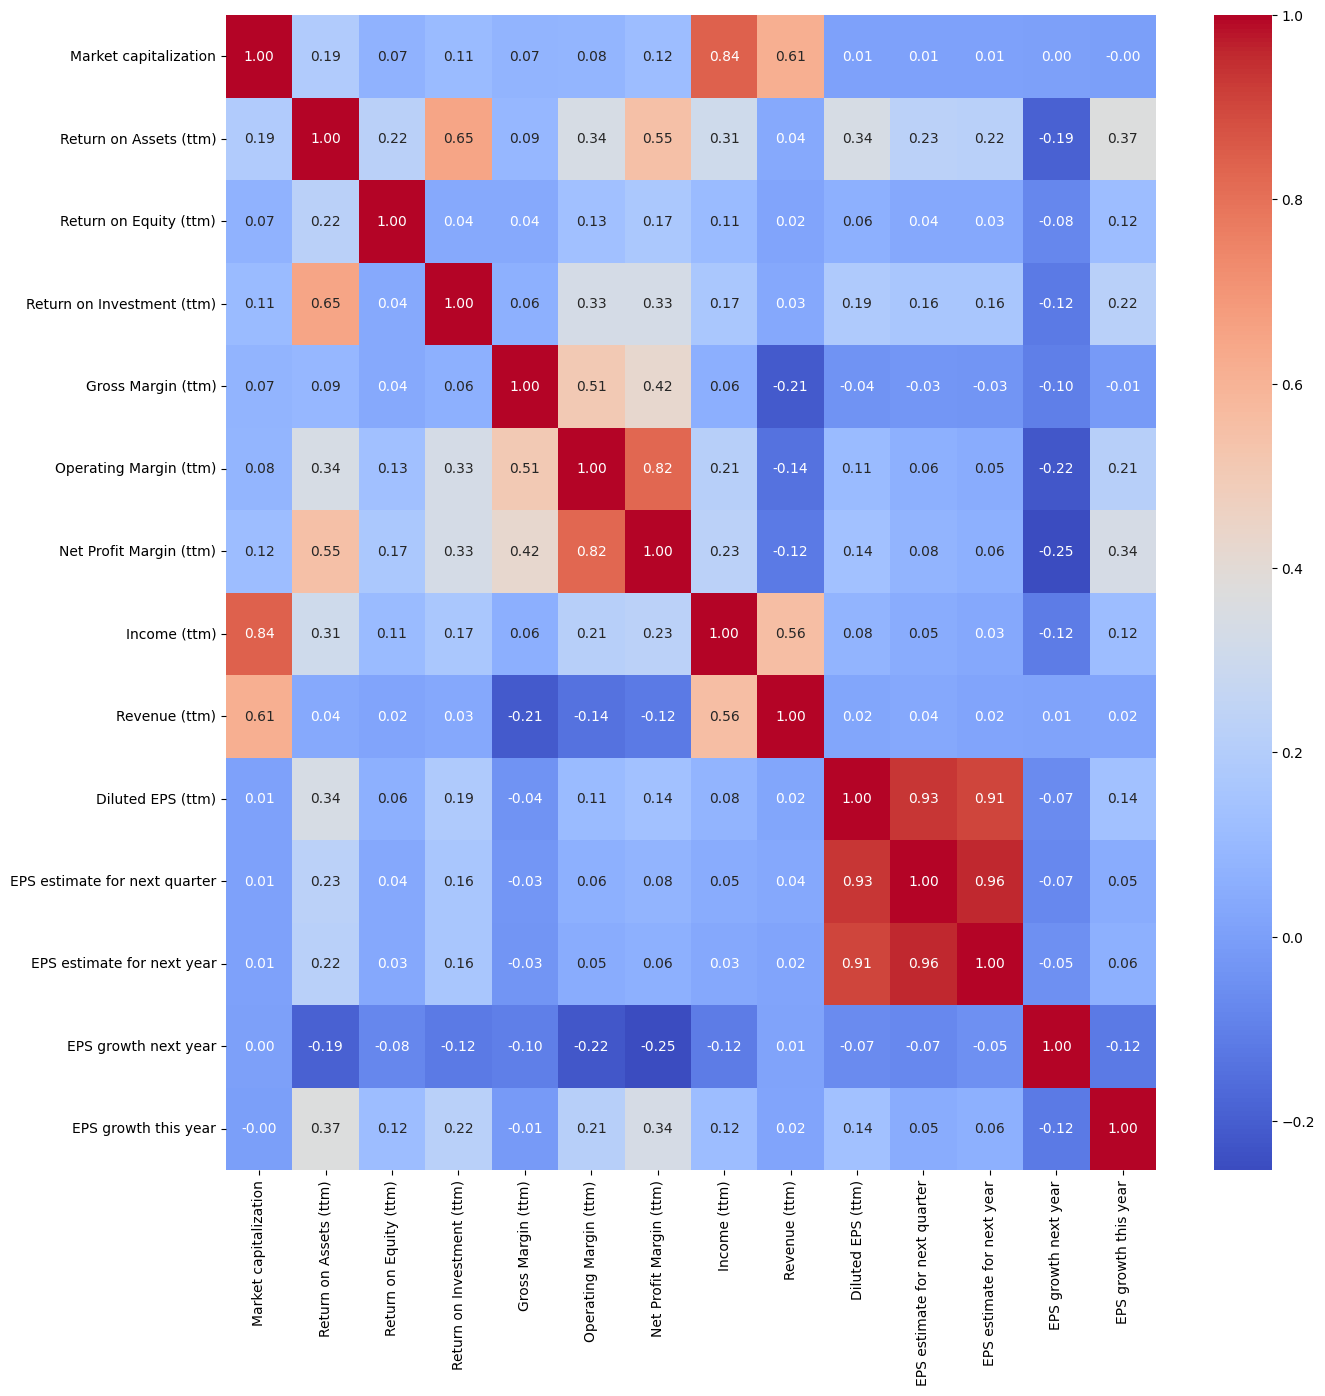

In [62]:
df_sel = df[['Company','Major index membership', 'Market capitalization', 'Return on Assets (ttm)', 'Return on Equity (ttm)', 'Return on Investment (ttm)',
             'Gross Margin (ttm)', 'Operating Margin (ttm)', 'Net Profit Margin (ttm)', 'Income (ttm)', 'Revenue (ttm)', 'Diluted EPS (ttm)', 'EPS estimate for next quarter',
             'EPS estimate for next year', 'EPS growth next year', 'EPS growth this year']]

df_num = df_sel.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = df_num.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")

Se observa una fuerte correlación positiva (0.84) entre la capitalización de mercado y los ingresos, lo que indica que, en general, las empresas más grandes tienden a generar mayores ingresos. Los márgenes operativos y netos están altamente correlacionados (0.82), lo que refleja que una mejor gestión de costos operativos a menudo resulta en mayores beneficios netos para las empresas. También, existe una alta correlación (0.65) entre ROA y ROI, lo que implica que las empresas que gestionan bien sus activos también tienden a tener buenas inversiones.

Llama la atención la alta correlación de las estimaciones de EPS para el próximo trimestre (0.93) y el próximo año (0.91), lo que indica que las expectativas futuras de ganancias están fuertemente alineadas con las ganancias actuales.

## Imputación de datos faltantes con IterativeImputer()

In [63]:
imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)
df_sel[df_num.columns] = df_imputed
print(df_sel.isnull().sum())

Company                          0
Major index membership           6
Market capitalization            0
Return on Assets (ttm)           0
Return on Equity (ttm)           0
Return on Investment (ttm)       0
Gross Margin (ttm)               0
Operating Margin (ttm)           0
Net Profit Margin (ttm)          0
Income (ttm)                     0
Revenue (ttm)                    0
Diluted EPS (ttm)                0
EPS estimate for next quarter    0
EPS estimate for next year       0
EPS growth next year             0
EPS growth this year             0
dtype: int64


C:\Users\Valen\AppData\Local\Temp\ipykernel_1240\2473284826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel[df_num.columns] = df_imputed


<Figure size 1200x600 with 0 Axes>

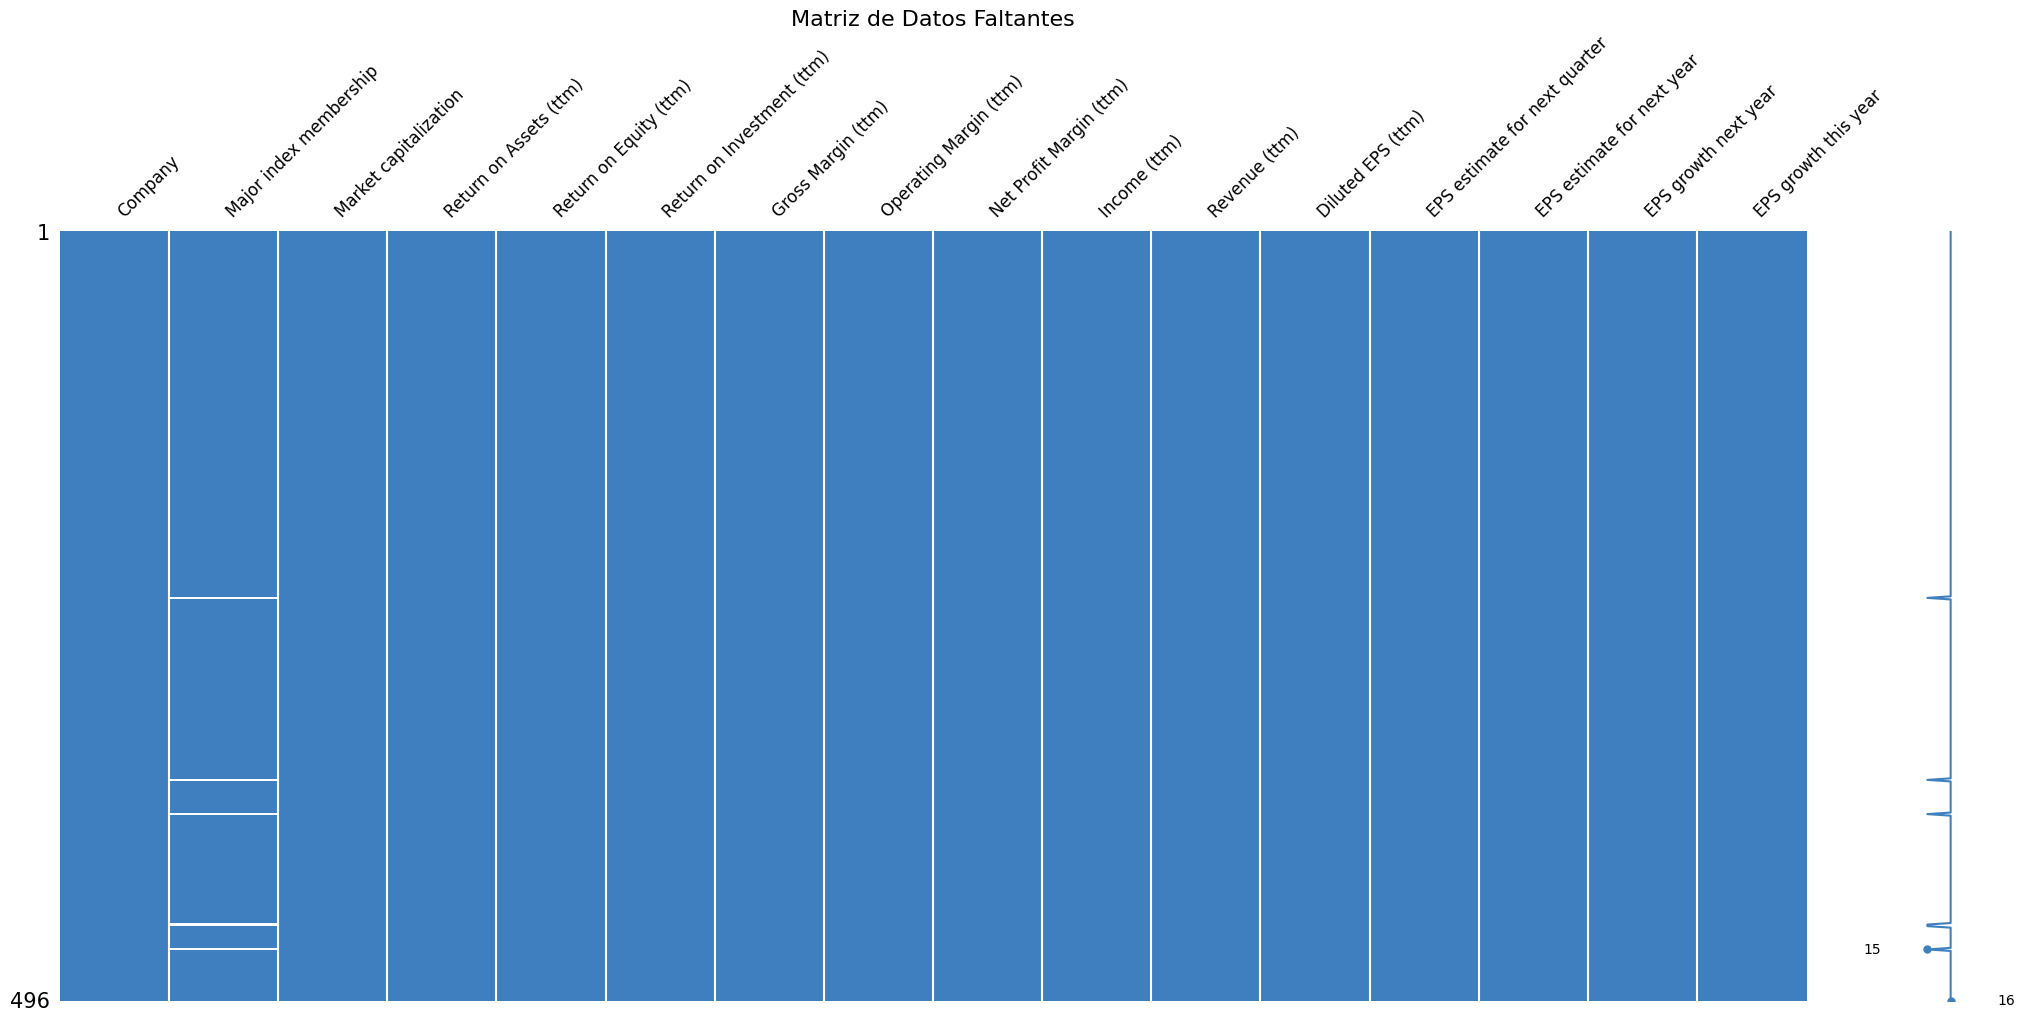

In [75]:
plt.figure(figsize=(12, 6))
msno.matrix(df_sel, color=(0.25, 0.5, 0.75), fontsize=12)
plt.title('Matriz de Datos Faltantes', fontsize=16)
plt.show()

Ahora solo se presentan datos faltantes en `Major index membership`, variable que ya fue revisada y corresponden a empresas que on figuran en inguno de los índices principales. 

<Axes: >

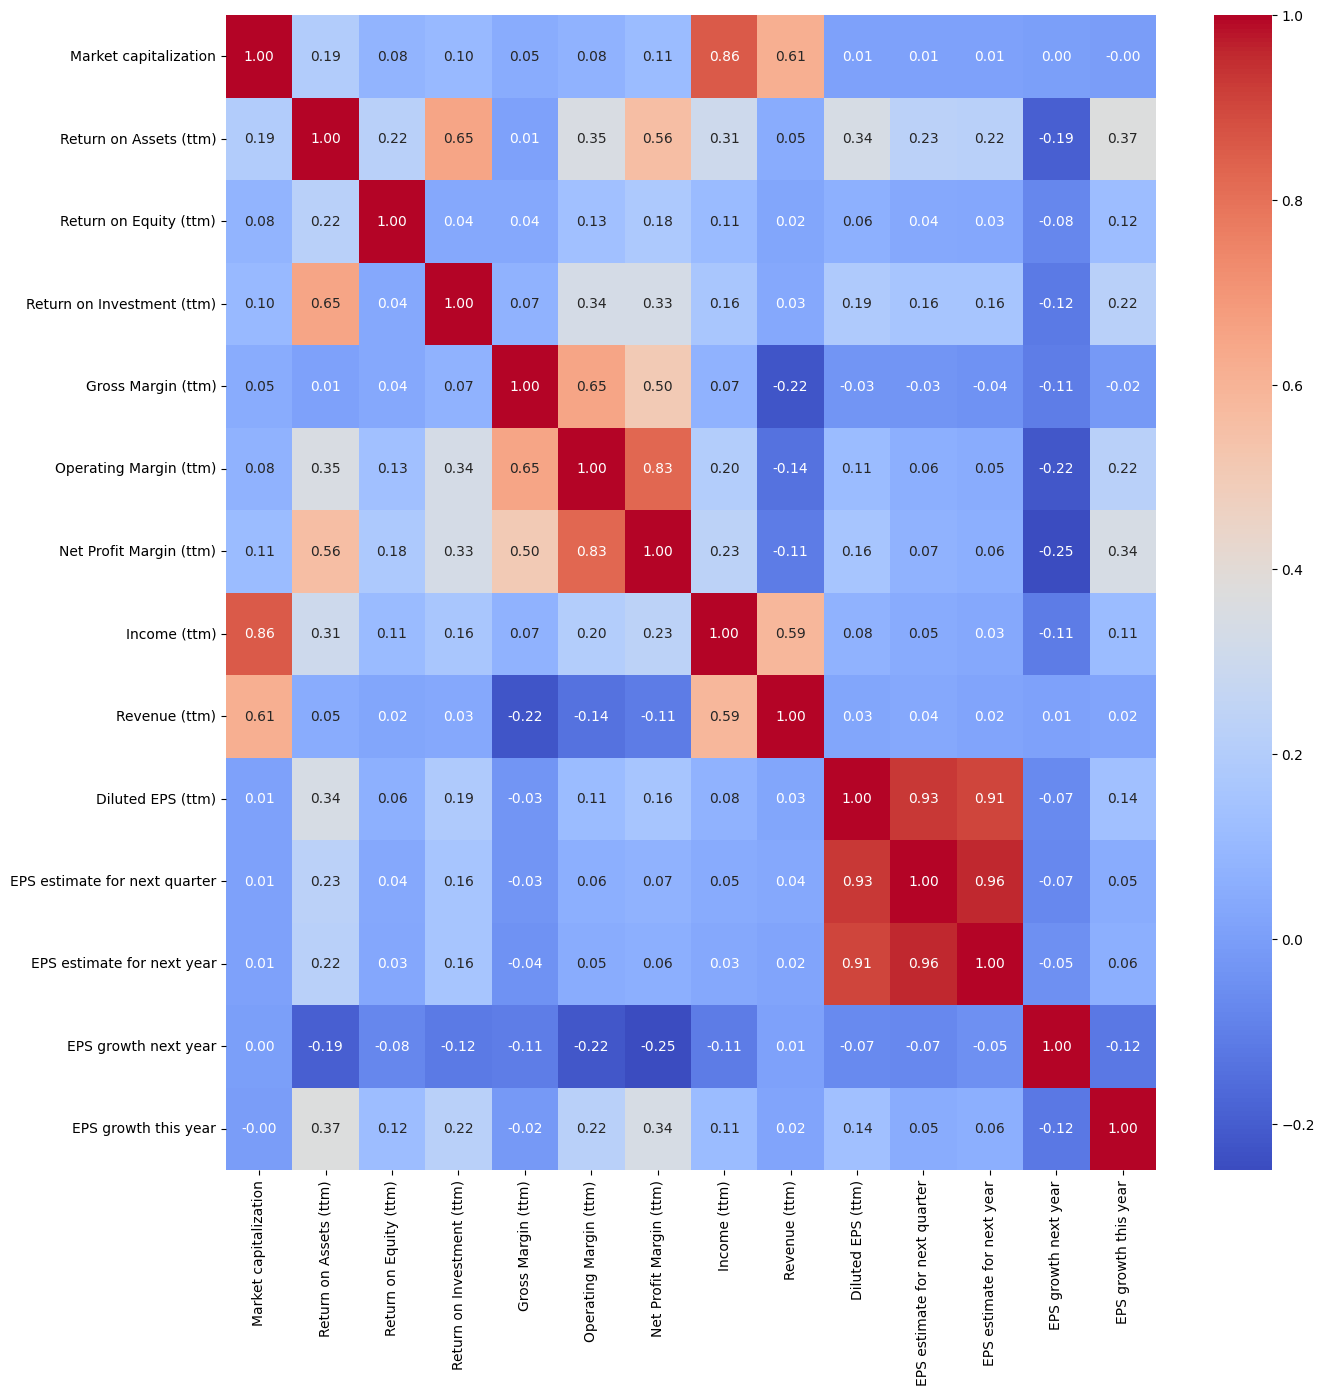

In [68]:
df_num = df_sel.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = df_num.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")

Al comparar la nueva correlación con la de las variables antes de imputar, no parece haber cambios significativos, manteniendo magnitudes y signos.

## VIF

In [69]:
df_num = sm.add_constant(df_num)

vif_data = pd.DataFrame()
vif_data['Variable'] = df_num.columns
vif_data['VIF'] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

print(vif_data)

                         Variable        VIF
0                           const  10.441742
1           Market capitalization   4.506196
2          Return on Assets (ttm)   3.505183
3          Return on Equity (ttm)   1.085905
4      Return on Investment (ttm)   2.070405
5              Gross Margin (ttm)   2.086500
6          Operating Margin (ttm)   4.722008
7         Net Profit Margin (ttm)   4.914455
8                    Income (ttm)   4.708763
9                   Revenue (ttm)   1.933360
10              Diluted EPS (ttm)   9.548762
11  EPS estimate for next quarter  18.312148
12     EPS estimate for next year  13.173909
13           EPS growth next year   1.116216
14           EPS growth this year   1.280250


Se procede a eliminar la variable con mayor VIF, es decir, el EPs estimado para el próximo trimestre y se repetirá el proceso para las variables restantes. 

In [ ]:
df_num = df_num.drop(columns= ['EPS estimate for next quarter'])

In [74]:
df_num = sm.add_constant(df_num)

vif_data = pd.DataFrame()
vif_data['Variable'] = df_num.columns
vif_data['VIF'] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

print(vif_data)

                      Variable        VIF
0                        const  10.415642
1        Market capitalization   4.503434
2       Return on Assets (ttm)   3.469189
3       Return on Equity (ttm)   1.085773
4   Return on Investment (ttm)   2.059962
5           Gross Margin (ttm)   2.085128
6       Operating Margin (ttm)   4.721911
7      Net Profit Margin (ttm)   4.914242
8                 Income (ttm)   4.708369
9                Revenue (ttm)   1.924666
10           Diluted EPS (ttm)   6.790234
11  EPS estimate for next year   6.259998
12        EPS growth next year   1.103093
13        EPS growth this year   1.259225


Ahora todas las variables cuentan con un VIF inferior a 10 se puede considerar estar libre de problemas de multicolinealidad. 